##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 卷积神经网络（Convolutional Neural Network, CNN）

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://tensorflow.google.cn/tutorials/images/cnn"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看</a>
</td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/images/cnn.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a>   </td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/images/cnn.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 GitHub 上查看源代码</a>   </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/images/cnn.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a>
</td>
</table>

本教程展示了如何训练一个简单的[卷积神经网络](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) 来对 [CIFAR 图像](https://www.cs.toronto.edu/~kriz/cifar.html)进行分类。由于本教程使用的是 [Keras Sequential API](https://tensorflow.google.cn/guide/keras/overview)，创建和训练模型只需要几行代码。


### 导入 TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### 下载并准备 CIFAR10 数据集

CIFAR10 数据集包含 10 类，共 60000 张彩色图片，每类图片有 6000 张。此数据集中 50000 个样例被作为训练集，剩余 10000 个样例作为测试集。类之间相互独立，不存在重叠的部分。

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### 验证数据

为了验证数据集看起来是否正确，我们绘制训练集中的前 25 张图像并在每张图像下方显示类名称：


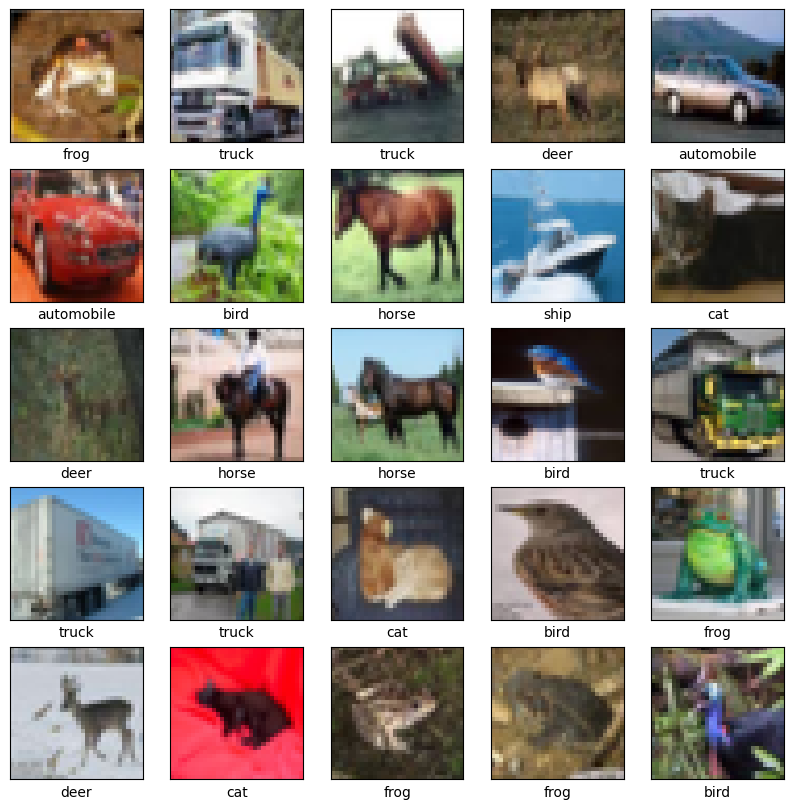

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

下方展示的 6 行代码声明了了一个常见卷积神经网络，由几个 [Conv2D](https://tensorflow.google.cn/api_docs/python/tf/keras/layers/Conv2D) 和 [MaxPooling2D](https://tensorflow.google.cn/api_docs/python/tf/keras/layers/MaxPool2D) 层组成。

CNN 将形状为 (image_height, image_width, color_channels) 的张量作为输入，忽略批次大小。如果您不熟悉这些维度，color_channels 是指 (R,G,B)。在此示例中，您将配置 CNN 以处理形状为 (32, 32, 3) 的输入，即 CIFAR 图像的格式。您可以通过将参数 `input_shape` 传递给第一层来实现此目的。


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


到目前为止，模型的架构如下：

In [12]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

在上面的结构中，您可以看到每个 Conv2D 和 MaxPooling2D 层的输出都是一个三维的张量 (Tensor)，其形状描述了 (height, width, channels)。越深的层中，宽度和高度都会收缩。每个 Conv2D 层输出的通道数量 (channels) 取决于声明层时的第一个参数（如：上面代码中的 32 或 64）。这样，由于宽度和高度的收缩，您便可以（从运算的角度）增加每个 Conv2D 层输出的通道数量 (channels)。

### 增加 Dense 层

为了完成模型，您需要将卷积基（形状为 (4, 4, 64)）的最后一个输出张量馈送到一个或多个 Dense 层以执行分类。Dense 层将向量作为输入（即 1 维），而当前输出为 3 维张量。首先，将 3 维输出展平（或展开）为 1 维，然后在顶部添加一个或多个 Dense 层。CIFAR 有 10 个输出类，因此使用具有 10 个输出的最终 Dense 层。

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

下面是模型的完整架构：

In [8]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 30, 30, 32)        896       


 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         


 D)                                                              


 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     


 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


 flatten (Flatten)           (None, 1024)              0         


 dense (Dense)               (None, 64)                65600     


 dense_1 (Dense)             (None, 10)                650       


Total params: 122570 (478.79 KB)


Trainable params: 122570 (478.79 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


网络摘要显示 (4, 4, 64) 输出在经过两个 Dense 层之前被展平为形状为 (1024) 的向量。

### 编译并训练模型

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


I0000 00:00:1699398471.661645  508357 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



   1/1563 [..............................] - ETA: 1:20:12 - loss: 2.2859 - accuracy: 0.1875


  13/1563 [..............................] - ETA: 6s - loss: 2.3044 - accuracy: 0.1034     


  26/1563 [..............................] - ETA: 6s - loss: 2.3022 - accuracy: 0.1118


  40/1563 [..............................] - ETA: 6s - loss: 2.2839 - accuracy: 0.1359


  54/1563 [>.............................] - ETA: 5s - loss: 2.2500 - accuracy: 0.1545


  68/1563 [>.............................] - ETA: 5s - loss: 2.2188 - accuracy: 0.1641


  82/1563 [>.............................] - ETA: 5s - loss: 2.1869 - accuracy: 0.1764


  95/1563 [>.............................] - ETA: 5s - loss: 2.1537 - accuracy: 0.1888


 108/1563 [=>............................] - ETA: 5s - loss: 2.1314 - accuracy: 0.1979


 121/1563 [=>............................] - ETA: 5s - loss: 2.1180 - accuracy: 0.2053


 134/1563 [=>............................] - ETA: 5s - loss: 2.0991 - accuracy: 0.2122


 146/1563 [=>............................] - ETA: 5s - loss: 2.0804 - accuracy: 0.2198


 158/1563 [==>...........................] - ETA: 5s - loss: 2.0635 - accuracy: 0.2257


 170/1563 [==>...........................] - ETA: 5s - loss: 2.0447 - accuracy: 0.2305


 182/1563 [==>...........................] - ETA: 5s - loss: 2.0301 - accuracy: 0.2380


 195/1563 [==>...........................] - ETA: 5s - loss: 2.0150 - accuracy: 0.2462


 208/1563 [==>...........................] - ETA: 5s - loss: 1.9991 - accuracy: 0.2523


 221/1563 [===>..........................] - ETA: 5s - loss: 1.9842 - accuracy: 0.2585


 234/1563 [===>..........................] - ETA: 5s - loss: 1.9760 - accuracy: 0.2630


 247/1563 [===>..........................] - ETA: 5s - loss: 1.9677 - accuracy: 0.2682


 260/1563 [===>..........................] - ETA: 5s - loss: 1.9592 - accuracy: 0.2708


 273/1563 [====>.........................] - ETA: 5s - loss: 1.9505 - accuracy: 0.2736


 286/1563 [====>.........................] - ETA: 5s - loss: 1.9372 - accuracy: 0.2794


 299/1563 [====>.........................] - ETA: 5s - loss: 1.9250 - accuracy: 0.2839


 312/1563 [====>.........................] - ETA: 5s - loss: 1.9115 - accuracy: 0.2887


 325/1563 [=====>........................] - ETA: 4s - loss: 1.8999 - accuracy: 0.2909


 338/1563 [=====>........................] - ETA: 4s - loss: 1.8887 - accuracy: 0.2954


 351/1563 [=====>........................] - ETA: 4s - loss: 1.8805 - accuracy: 0.2994


 364/1563 [=====>........................] - ETA: 4s - loss: 1.8713 - accuracy: 0.3032


 378/1563 [======>.......................] - ETA: 4s - loss: 1.8639 - accuracy: 0.3061


 391/1563 [======>.......................] - ETA: 4s - loss: 1.8550 - accuracy: 0.3097


 404/1563 [======>.......................] - ETA: 4s - loss: 1.8472 - accuracy: 0.3134


 417/1563 [=======>......................] - ETA: 4s - loss: 1.8372 - accuracy: 0.3180


 430/1563 [=======>......................] - ETA: 4s - loss: 1.8296 - accuracy: 0.3198


 443/1563 [=======>......................] - ETA: 4s - loss: 1.8249 - accuracy: 0.3220


 456/1563 [=======>......................] - ETA: 4s - loss: 1.8161 - accuracy: 0.3250


 469/1563 [========>.....................] - ETA: 4s - loss: 1.8074 - accuracy: 0.3278


 482/1563 [========>.....................] - ETA: 4s - loss: 1.7978 - accuracy: 0.3311


 495/1563 [========>.....................] - ETA: 4s - loss: 1.7900 - accuracy: 0.3338


 508/1563 [========>.....................] - ETA: 4s - loss: 1.7828 - accuracy: 0.3361


 521/1563 [=========>....................] - ETA: 4s - loss: 1.7758 - accuracy: 0.3391


 534/1563 [=========>....................] - ETA: 4s - loss: 1.7697 - accuracy: 0.3417


 547/1563 [=========>....................] - ETA: 4s - loss: 1.7626 - accuracy: 0.3448


 560/1563 [=========>....................] - ETA: 4s - loss: 1.7575 - accuracy: 0.3464


 573/1563 [=========>....................] - ETA: 3s - loss: 1.7527 - accuracy: 0.3481


 586/1563 [==========>...................] - ETA: 3s - loss: 1.7478 - accuracy: 0.3502


 599/1563 [==========>...................] - ETA: 3s - loss: 1.7417 - accuracy: 0.3524


 612/1563 [==========>...................] - ETA: 3s - loss: 1.7364 - accuracy: 0.3551


 625/1563 [==========>...................] - ETA: 3s - loss: 1.7326 - accuracy: 0.3569


 638/1563 [===========>..................] - ETA: 3s - loss: 1.7288 - accuracy: 0.3580


 651/1563 [===========>..................] - ETA: 3s - loss: 1.7246 - accuracy: 0.3601


 664/1563 [===========>..................] - ETA: 3s - loss: 1.7176 - accuracy: 0.3632


 677/1563 [===========>..................] - ETA: 3s - loss: 1.7131 - accuracy: 0.3647


 690/1563 [============>.................] - ETA: 3s - loss: 1.7114 - accuracy: 0.3649


 703/1563 [============>.................] - ETA: 3s - loss: 1.7069 - accuracy: 0.3662


 716/1563 [============>.................] - ETA: 3s - loss: 1.7018 - accuracy: 0.3688


 729/1563 [============>.................] - ETA: 3s - loss: 1.6965 - accuracy: 0.3711


 742/1563 [=============>................] - ETA: 3s - loss: 1.6930 - accuracy: 0.3731


 756/1563 [=============>................] - ETA: 3s - loss: 1.6880 - accuracy: 0.3750


 770/1563 [=============>................] - ETA: 3s - loss: 1.6829 - accuracy: 0.3770


 783/1563 [==============>...............] - ETA: 3s - loss: 1.6783 - accuracy: 0.3784


 796/1563 [==============>...............] - ETA: 3s - loss: 1.6730 - accuracy: 0.3803


 809/1563 [==============>...............] - ETA: 3s - loss: 1.6699 - accuracy: 0.3813


 823/1563 [==============>...............] - ETA: 2s - loss: 1.6645 - accuracy: 0.3836


 836/1563 [===============>..............] - ETA: 2s - loss: 1.6601 - accuracy: 0.3853


 849/1563 [===============>..............] - ETA: 2s - loss: 1.6560 - accuracy: 0.3866


 862/1563 [===============>..............] - ETA: 2s - loss: 1.6516 - accuracy: 0.3886


 876/1563 [===============>..............] - ETA: 2s - loss: 1.6479 - accuracy: 0.3902


 889/1563 [================>.............] - ETA: 2s - loss: 1.6454 - accuracy: 0.3911


 902/1563 [================>.............] - ETA: 2s - loss: 1.6451 - accuracy: 0.3911


 915/1563 [================>.............] - ETA: 2s - loss: 1.6422 - accuracy: 0.3923


 928/1563 [================>.............] - ETA: 2s - loss: 1.6390 - accuracy: 0.3937


 941/1563 [=================>............] - ETA: 2s - loss: 1.6351 - accuracy: 0.3950


 954/1563 [=================>............] - ETA: 2s - loss: 1.6325 - accuracy: 0.3957


 967/1563 [=================>............] - ETA: 2s - loss: 1.6289 - accuracy: 0.3974


 980/1563 [=================>............] - ETA: 2s - loss: 1.6264 - accuracy: 0.3982


 993/1563 [==================>...........] - ETA: 2s - loss: 1.6234 - accuracy: 0.3992


1007/1563 [==================>...........] - ETA: 2s - loss: 1.6193 - accuracy: 0.4009


1020/1563 [==================>...........] - ETA: 2s - loss: 1.6155 - accuracy: 0.4028


1034/1563 [==================>...........] - ETA: 2s - loss: 1.6120 - accuracy: 0.4044


1047/1563 [===================>..........] - ETA: 2s - loss: 1.6092 - accuracy: 0.4058


1060/1563 [===================>..........] - ETA: 1s - loss: 1.6066 - accuracy: 0.4072


1073/1563 [===================>..........] - ETA: 1s - loss: 1.6036 - accuracy: 0.4085


1086/1563 [===================>..........] - ETA: 1s - loss: 1.6019 - accuracy: 0.4096


1100/1563 [====================>.........] - ETA: 1s - loss: 1.5988 - accuracy: 0.4110


1114/1563 [====================>.........] - ETA: 1s - loss: 1.5964 - accuracy: 0.4118


1128/1563 [====================>.........] - ETA: 1s - loss: 1.5929 - accuracy: 0.4131


1141/1563 [====================>.........] - ETA: 1s - loss: 1.5905 - accuracy: 0.4142


1154/1563 [=====================>........] - ETA: 1s - loss: 1.5878 - accuracy: 0.4151


1168/1563 [=====================>........] - ETA: 1s - loss: 1.5843 - accuracy: 0.4166


1181/1563 [=====================>........] - ETA: 1s - loss: 1.5813 - accuracy: 0.4178


1194/1563 [=====================>........] - ETA: 1s - loss: 1.5787 - accuracy: 0.4188


1207/1563 [======================>.......] - ETA: 1s - loss: 1.5768 - accuracy: 0.4195


1220/1563 [======================>.......] - ETA: 1s - loss: 1.5745 - accuracy: 0.4208


1233/1563 [======================>.......] - ETA: 1s - loss: 1.5722 - accuracy: 0.4215


1246/1563 [======================>.......] - ETA: 1s - loss: 1.5698 - accuracy: 0.4224


1259/1563 [=======================>......] - ETA: 1s - loss: 1.5676 - accuracy: 0.4234


1272/1563 [=======================>......] - ETA: 1s - loss: 1.5650 - accuracy: 0.4245


1285/1563 [=======================>......] - ETA: 1s - loss: 1.5632 - accuracy: 0.4253


1298/1563 [=======================>......] - ETA: 1s - loss: 1.5604 - accuracy: 0.4264


1311/1563 [========================>.....] - ETA: 0s - loss: 1.5585 - accuracy: 0.4269


1324/1563 [========================>.....] - ETA: 0s - loss: 1.5558 - accuracy: 0.4282


1337/1563 [========================>.....] - ETA: 0s - loss: 1.5529 - accuracy: 0.4295


1350/1563 [========================>.....] - ETA: 0s - loss: 1.5498 - accuracy: 0.4306


1363/1563 [=========================>....] - ETA: 0s - loss: 1.5469 - accuracy: 0.4316


1376/1563 [=========================>....] - ETA: 0s - loss: 1.5446 - accuracy: 0.4328


1389/1563 [=========================>....] - ETA: 0s - loss: 1.5423 - accuracy: 0.4338


1402/1563 [=========================>....] - ETA: 0s - loss: 1.5396 - accuracy: 0.4351


1415/1563 [==========================>...] - ETA: 0s - loss: 1.5370 - accuracy: 0.4363


1428/1563 [==========================>...] - ETA: 0s - loss: 1.5348 - accuracy: 0.4371


1441/1563 [==========================>...] - ETA: 0s - loss: 1.5329 - accuracy: 0.4378


1454/1563 [==========================>...] - ETA: 0s - loss: 1.5305 - accuracy: 0.4389


1467/1563 [===========================>..] - ETA: 0s - loss: 1.5286 - accuracy: 0.4396


1480/1563 [===========================>..] - ETA: 0s - loss: 1.5270 - accuracy: 0.4403


1493/1563 [===========================>..] - ETA: 0s - loss: 1.5239 - accuracy: 0.4415


1506/1563 [===========================>..] - ETA: 0s - loss: 1.5228 - accuracy: 0.4420


1520/1563 [============================>.] - ETA: 0s - loss: 1.5207 - accuracy: 0.4429


1533/1563 [============================>.] - ETA: 0s - loss: 1.5182 - accuracy: 0.4441


1546/1563 [============================>.] - ETA: 0s - loss: 1.5160 - accuracy: 0.4450


1560/1563 [============================>.] - ETA: 0s - loss: 1.5133 - accuracy: 0.4460


1563/1563 [==============================] - ETA: 0s - loss: 1.5134 - accuracy: 0.4460


1563/1563 [==============================] - 11s 5ms/step - loss: 1.5134 - accuracy: 0.4460 - val_loss: 1.2960 - val_accuracy: 0.5345


Epoch 2/10



   1/1563 [..............................] - ETA: 8s - loss: 1.1149 - accuracy: 0.7812


  14/1563 [..............................] - ETA: 6s - loss: 1.2803 - accuracy: 0.5603


  28/1563 [..............................] - ETA: 5s - loss: 1.2568 - accuracy: 0.5737


  41/1563 [..............................] - ETA: 5s - loss: 1.2567 - accuracy: 0.5617


  54/1563 [>.............................] - ETA: 5s - loss: 1.2424 - accuracy: 0.5613


  67/1563 [>.............................] - ETA: 5s - loss: 1.2478 - accuracy: 0.5634


  80/1563 [>.............................] - ETA: 5s - loss: 1.2289 - accuracy: 0.5688


  93/1563 [>.............................] - ETA: 5s - loss: 1.2361 - accuracy: 0.5655


 106/1563 [=>............................] - ETA: 5s - loss: 1.2346 - accuracy: 0.5625


 120/1563 [=>............................] - ETA: 5s - loss: 1.2291 - accuracy: 0.5651


 134/1563 [=>............................] - ETA: 5s - loss: 1.2278 - accuracy: 0.5674


 147/1563 [=>............................] - ETA: 5s - loss: 1.2213 - accuracy: 0.5693


 160/1563 [==>...........................] - ETA: 5s - loss: 1.2212 - accuracy: 0.5668


 173/1563 [==>...........................] - ETA: 5s - loss: 1.2150 - accuracy: 0.5665


 186/1563 [==>...........................] - ETA: 5s - loss: 1.2145 - accuracy: 0.5664


 199/1563 [==>...........................] - ETA: 5s - loss: 1.2157 - accuracy: 0.5669


 212/1563 [===>..........................] - ETA: 5s - loss: 1.2118 - accuracy: 0.5665


 225/1563 [===>..........................] - ETA: 5s - loss: 1.2135 - accuracy: 0.5667


 238/1563 [===>..........................] - ETA: 5s - loss: 1.2117 - accuracy: 0.5668


 251/1563 [===>..........................] - ETA: 5s - loss: 1.2071 - accuracy: 0.5676


 263/1563 [====>.........................] - ETA: 5s - loss: 1.2066 - accuracy: 0.5683


 275/1563 [====>.........................] - ETA: 5s - loss: 1.2055 - accuracy: 0.5688


 288/1563 [====>.........................] - ETA: 5s - loss: 1.2052 - accuracy: 0.5697


 301/1563 [====>.........................] - ETA: 5s - loss: 1.2056 - accuracy: 0.5712


 314/1563 [=====>........................] - ETA: 4s - loss: 1.2022 - accuracy: 0.5724


 327/1563 [=====>........................] - ETA: 4s - loss: 1.2043 - accuracy: 0.5720


 340/1563 [=====>........................] - ETA: 4s - loss: 1.2058 - accuracy: 0.5721


 353/1563 [=====>........................] - ETA: 4s - loss: 1.2058 - accuracy: 0.5729


 366/1563 [======>.......................] - ETA: 4s - loss: 1.2063 - accuracy: 0.5721


 379/1563 [======>.......................] - ETA: 4s - loss: 1.2059 - accuracy: 0.5726


 392/1563 [======>.......................] - ETA: 4s - loss: 1.2073 - accuracy: 0.5732


 405/1563 [======>.......................] - ETA: 4s - loss: 1.2063 - accuracy: 0.5725


 418/1563 [=======>......................] - ETA: 4s - loss: 1.2046 - accuracy: 0.5736


 431/1563 [=======>......................] - ETA: 4s - loss: 1.2029 - accuracy: 0.5741


 444/1563 [=======>......................] - ETA: 4s - loss: 1.1993 - accuracy: 0.5749


 457/1563 [=======>......................] - ETA: 4s - loss: 1.2002 - accuracy: 0.5747


 470/1563 [========>.....................] - ETA: 4s - loss: 1.1984 - accuracy: 0.5747


 483/1563 [========>.....................] - ETA: 4s - loss: 1.1953 - accuracy: 0.5762


 496/1563 [========>.....................] - ETA: 4s - loss: 1.1942 - accuracy: 0.5766


 508/1563 [========>.....................] - ETA: 4s - loss: 1.1962 - accuracy: 0.5758


 521/1563 [=========>....................] - ETA: 4s - loss: 1.1957 - accuracy: 0.5760


 534/1563 [=========>....................] - ETA: 4s - loss: 1.1969 - accuracy: 0.5754


 547/1563 [=========>....................] - ETA: 4s - loss: 1.1943 - accuracy: 0.5772


 560/1563 [=========>....................] - ETA: 4s - loss: 1.1927 - accuracy: 0.5780


 573/1563 [=========>....................] - ETA: 3s - loss: 1.1944 - accuracy: 0.5777


 586/1563 [==========>...................] - ETA: 3s - loss: 1.1931 - accuracy: 0.5777


 599/1563 [==========>...................] - ETA: 3s - loss: 1.1939 - accuracy: 0.5771


 612/1563 [==========>...................] - ETA: 3s - loss: 1.1922 - accuracy: 0.5781


 625/1563 [==========>...................] - ETA: 3s - loss: 1.1919 - accuracy: 0.5783


 638/1563 [===========>..................] - ETA: 3s - loss: 1.1926 - accuracy: 0.5778


 651/1563 [===========>..................] - ETA: 3s - loss: 1.1923 - accuracy: 0.5779


 664/1563 [===========>..................] - ETA: 3s - loss: 1.1928 - accuracy: 0.5777


 677/1563 [===========>..................] - ETA: 3s - loss: 1.1916 - accuracy: 0.5779


 690/1563 [============>.................] - ETA: 3s - loss: 1.1897 - accuracy: 0.5783


 703/1563 [============>.................] - ETA: 3s - loss: 1.1907 - accuracy: 0.5776


 716/1563 [============>.................] - ETA: 3s - loss: 1.1914 - accuracy: 0.5778


 729/1563 [============>.................] - ETA: 3s - loss: 1.1913 - accuracy: 0.5778


 742/1563 [=============>................] - ETA: 3s - loss: 1.1923 - accuracy: 0.5776


 755/1563 [=============>................] - ETA: 3s - loss: 1.1921 - accuracy: 0.5775


 768/1563 [=============>................] - ETA: 3s - loss: 1.1917 - accuracy: 0.5779


 781/1563 [=============>................] - ETA: 3s - loss: 1.1905 - accuracy: 0.5777


 794/1563 [==============>...............] - ETA: 3s - loss: 1.1913 - accuracy: 0.5773


 807/1563 [==============>...............] - ETA: 3s - loss: 1.1900 - accuracy: 0.5775


 820/1563 [==============>...............] - ETA: 2s - loss: 1.1888 - accuracy: 0.5780


 833/1563 [==============>...............] - ETA: 2s - loss: 1.1864 - accuracy: 0.5787


 846/1563 [===============>..............] - ETA: 2s - loss: 1.1857 - accuracy: 0.5788


 859/1563 [===============>..............] - ETA: 2s - loss: 1.1848 - accuracy: 0.5791


 873/1563 [===============>..............] - ETA: 2s - loss: 1.1841 - accuracy: 0.5793


 886/1563 [================>.............] - ETA: 2s - loss: 1.1829 - accuracy: 0.5800


 899/1563 [================>.............] - ETA: 2s - loss: 1.1819 - accuracy: 0.5804


 913/1563 [================>.............] - ETA: 2s - loss: 1.1811 - accuracy: 0.5803


 926/1563 [================>.............] - ETA: 2s - loss: 1.1801 - accuracy: 0.5805


 939/1563 [=================>............] - ETA: 2s - loss: 1.1788 - accuracy: 0.5807


 953/1563 [=================>............] - ETA: 2s - loss: 1.1774 - accuracy: 0.5814


 967/1563 [=================>............] - ETA: 2s - loss: 1.1774 - accuracy: 0.5818


 980/1563 [=================>............] - ETA: 2s - loss: 1.1771 - accuracy: 0.5820


 993/1563 [==================>...........] - ETA: 2s - loss: 1.1764 - accuracy: 0.5821


1006/1563 [==================>...........] - ETA: 2s - loss: 1.1765 - accuracy: 0.5820


1020/1563 [==================>...........] - ETA: 2s - loss: 1.1758 - accuracy: 0.5820


1033/1563 [==================>...........] - ETA: 2s - loss: 1.1765 - accuracy: 0.5818


1046/1563 [===================>..........] - ETA: 2s - loss: 1.1754 - accuracy: 0.5823


1059/1563 [===================>..........] - ETA: 2s - loss: 1.1755 - accuracy: 0.5827


1072/1563 [===================>..........] - ETA: 1s - loss: 1.1757 - accuracy: 0.5827


1085/1563 [===================>..........] - ETA: 1s - loss: 1.1757 - accuracy: 0.5827


1098/1563 [====================>.........] - ETA: 1s - loss: 1.1743 - accuracy: 0.5836


1111/1563 [====================>.........] - ETA: 1s - loss: 1.1729 - accuracy: 0.5842


1125/1563 [====================>.........] - ETA: 1s - loss: 1.1716 - accuracy: 0.5846


1138/1563 [====================>.........] - ETA: 1s - loss: 1.1704 - accuracy: 0.5855


1151/1563 [=====================>........] - ETA: 1s - loss: 1.1697 - accuracy: 0.5857


1164/1563 [=====================>........] - ETA: 1s - loss: 1.1690 - accuracy: 0.5858


1177/1563 [=====================>........] - ETA: 1s - loss: 1.1676 - accuracy: 0.5864


1190/1563 [=====================>........] - ETA: 1s - loss: 1.1670 - accuracy: 0.5866


1204/1563 [======================>.......] - ETA: 1s - loss: 1.1664 - accuracy: 0.5868


1217/1563 [======================>.......] - ETA: 1s - loss: 1.1659 - accuracy: 0.5871


1231/1563 [======================>.......] - ETA: 1s - loss: 1.1652 - accuracy: 0.5873


1244/1563 [======================>.......] - ETA: 1s - loss: 1.1648 - accuracy: 0.5873


1257/1563 [=======================>......] - ETA: 1s - loss: 1.1625 - accuracy: 0.5882


1270/1563 [=======================>......] - ETA: 1s - loss: 1.1625 - accuracy: 0.5880


1283/1563 [=======================>......] - ETA: 1s - loss: 1.1622 - accuracy: 0.5883


1296/1563 [=======================>......] - ETA: 1s - loss: 1.1617 - accuracy: 0.5884


1309/1563 [========================>.....] - ETA: 1s - loss: 1.1602 - accuracy: 0.5890


1322/1563 [========================>.....] - ETA: 0s - loss: 1.1594 - accuracy: 0.5896


1335/1563 [========================>.....] - ETA: 0s - loss: 1.1589 - accuracy: 0.5901


1348/1563 [========================>.....] - ETA: 0s - loss: 1.1582 - accuracy: 0.5901


1361/1563 [=========================>....] - ETA: 0s - loss: 1.1575 - accuracy: 0.5904


1374/1563 [=========================>....] - ETA: 0s - loss: 1.1570 - accuracy: 0.5907


1387/1563 [=========================>....] - ETA: 0s - loss: 1.1562 - accuracy: 0.5909


1400/1563 [=========================>....] - ETA: 0s - loss: 1.1556 - accuracy: 0.5911


1413/1563 [==========================>...] - ETA: 0s - loss: 1.1548 - accuracy: 0.5913


1426/1563 [==========================>...] - ETA: 0s - loss: 1.1536 - accuracy: 0.5916


1439/1563 [==========================>...] - ETA: 0s - loss: 1.1533 - accuracy: 0.5919


1452/1563 [==========================>...] - ETA: 0s - loss: 1.1530 - accuracy: 0.5923


1465/1563 [===========================>..] - ETA: 0s - loss: 1.1524 - accuracy: 0.5925


1479/1563 [===========================>..] - ETA: 0s - loss: 1.1522 - accuracy: 0.5926


1492/1563 [===========================>..] - ETA: 0s - loss: 1.1522 - accuracy: 0.5927


1505/1563 [===========================>..] - ETA: 0s - loss: 1.1512 - accuracy: 0.5931


1518/1563 [============================>.] - ETA: 0s - loss: 1.1509 - accuracy: 0.5932


1531/1563 [============================>.] - ETA: 0s - loss: 1.1500 - accuracy: 0.5936


1544/1563 [============================>.] - ETA: 0s - loss: 1.1500 - accuracy: 0.5935


1557/1563 [============================>.] - ETA: 0s - loss: 1.1493 - accuracy: 0.5938


1563/1563 [==============================] - 7s 4ms/step - loss: 1.1488 - accuracy: 0.5939 - val_loss: 1.0667 - val_accuracy: 0.6218


Epoch 3/10



   1/1563 [..............................] - ETA: 8s - loss: 1.0582 - accuracy: 0.6562


  14/1563 [..............................] - ETA: 6s - loss: 0.9049 - accuracy: 0.6830


  27/1563 [..............................] - ETA: 6s - loss: 0.9372 - accuracy: 0.6574


  40/1563 [..............................] - ETA: 6s - loss: 0.9718 - accuracy: 0.6508


  53/1563 [>.............................] - ETA: 5s - loss: 0.9995 - accuracy: 0.6433


  66/1563 [>.............................] - ETA: 5s - loss: 1.0097 - accuracy: 0.6387


  79/1563 [>.............................] - ETA: 5s - loss: 1.0237 - accuracy: 0.6305


  92/1563 [>.............................] - ETA: 5s - loss: 1.0211 - accuracy: 0.6294


 105/1563 [=>............................] - ETA: 5s - loss: 1.0110 - accuracy: 0.6351


 119/1563 [=>............................] - ETA: 5s - loss: 1.0100 - accuracy: 0.6352


 132/1563 [=>............................] - ETA: 5s - loss: 1.0190 - accuracy: 0.6338


 145/1563 [=>............................] - ETA: 5s - loss: 1.0151 - accuracy: 0.6360


 158/1563 [==>...........................] - ETA: 5s - loss: 1.0104 - accuracy: 0.6386


 172/1563 [==>...........................] - ETA: 5s - loss: 1.0080 - accuracy: 0.6372


 185/1563 [==>...........................] - ETA: 5s - loss: 1.0044 - accuracy: 0.6373


 198/1563 [==>...........................] - ETA: 5s - loss: 1.0070 - accuracy: 0.6383


 211/1563 [===>..........................] - ETA: 5s - loss: 1.0090 - accuracy: 0.6385


 225/1563 [===>..........................] - ETA: 5s - loss: 1.0133 - accuracy: 0.6360


 238/1563 [===>..........................] - ETA: 5s - loss: 1.0189 - accuracy: 0.6347


 251/1563 [===>..........................] - ETA: 5s - loss: 1.0217 - accuracy: 0.6332


 264/1563 [====>.........................] - ETA: 5s - loss: 1.0227 - accuracy: 0.6327


 276/1563 [====>.........................] - ETA: 5s - loss: 1.0251 - accuracy: 0.6315


 289/1563 [====>.........................] - ETA: 5s - loss: 1.0268 - accuracy: 0.6318


 302/1563 [====>.........................] - ETA: 4s - loss: 1.0236 - accuracy: 0.6345


 315/1563 [=====>........................] - ETA: 4s - loss: 1.0214 - accuracy: 0.6361


 328/1563 [=====>........................] - ETA: 4s - loss: 1.0238 - accuracy: 0.6347


 342/1563 [=====>........................] - ETA: 4s - loss: 1.0204 - accuracy: 0.6349


 356/1563 [=====>........................] - ETA: 4s - loss: 1.0205 - accuracy: 0.6356


 370/1563 [======>.......................] - ETA: 4s - loss: 1.0197 - accuracy: 0.6355


 384/1563 [======>.......................] - ETA: 4s - loss: 1.0203 - accuracy: 0.6361


 397/1563 [======>.......................] - ETA: 4s - loss: 1.0185 - accuracy: 0.6369


 410/1563 [======>.......................] - ETA: 4s - loss: 1.0164 - accuracy: 0.6384


 423/1563 [=======>......................] - ETA: 4s - loss: 1.0167 - accuracy: 0.6380


 436/1563 [=======>......................] - ETA: 4s - loss: 1.0185 - accuracy: 0.6379


 449/1563 [=======>......................] - ETA: 4s - loss: 1.0198 - accuracy: 0.6376


 462/1563 [=======>......................] - ETA: 4s - loss: 1.0180 - accuracy: 0.6383


 475/1563 [========>.....................] - ETA: 4s - loss: 1.0167 - accuracy: 0.6391


 488/1563 [========>.....................] - ETA: 4s - loss: 1.0168 - accuracy: 0.6390


 501/1563 [========>.....................] - ETA: 4s - loss: 1.0142 - accuracy: 0.6395


 514/1563 [========>.....................] - ETA: 4s - loss: 1.0143 - accuracy: 0.6392


 527/1563 [=========>....................] - ETA: 4s - loss: 1.0138 - accuracy: 0.6392


 540/1563 [=========>....................] - ETA: 4s - loss: 1.0176 - accuracy: 0.6376


 553/1563 [=========>....................] - ETA: 3s - loss: 1.0198 - accuracy: 0.6368


 566/1563 [=========>....................] - ETA: 3s - loss: 1.0208 - accuracy: 0.6366


 579/1563 [==========>...................] - ETA: 3s - loss: 1.0220 - accuracy: 0.6361


 592/1563 [==========>...................] - ETA: 3s - loss: 1.0223 - accuracy: 0.6364


 605/1563 [==========>...................] - ETA: 3s - loss: 1.0227 - accuracy: 0.6364


 618/1563 [==========>...................] - ETA: 3s - loss: 1.0228 - accuracy: 0.6359


 631/1563 [===========>..................] - ETA: 3s - loss: 1.0226 - accuracy: 0.6361


 644/1563 [===========>..................] - ETA: 3s - loss: 1.0222 - accuracy: 0.6363


 657/1563 [===========>..................] - ETA: 3s - loss: 1.0218 - accuracy: 0.6368


 670/1563 [===========>..................] - ETA: 3s - loss: 1.0216 - accuracy: 0.6372


 683/1563 [============>.................] - ETA: 3s - loss: 1.0210 - accuracy: 0.6378


 696/1563 [============>.................] - ETA: 3s - loss: 1.0199 - accuracy: 0.6385


 709/1563 [============>.................] - ETA: 3s - loss: 1.0200 - accuracy: 0.6383


 722/1563 [============>.................] - ETA: 3s - loss: 1.0194 - accuracy: 0.6385


 735/1563 [=============>................] - ETA: 3s - loss: 1.0197 - accuracy: 0.6384


 748/1563 [=============>................] - ETA: 3s - loss: 1.0198 - accuracy: 0.6383


 761/1563 [=============>................] - ETA: 3s - loss: 1.0203 - accuracy: 0.6382


 774/1563 [=============>................] - ETA: 3s - loss: 1.0215 - accuracy: 0.6377


 787/1563 [==============>...............] - ETA: 3s - loss: 1.0209 - accuracy: 0.6379


 800/1563 [==============>...............] - ETA: 3s - loss: 1.0198 - accuracy: 0.6388


 813/1563 [==============>...............] - ETA: 2s - loss: 1.0209 - accuracy: 0.6386


 826/1563 [==============>...............] - ETA: 2s - loss: 1.0212 - accuracy: 0.6384


 839/1563 [===============>..............] - ETA: 2s - loss: 1.0221 - accuracy: 0.6385


 852/1563 [===============>..............] - ETA: 2s - loss: 1.0222 - accuracy: 0.6385


 866/1563 [===============>..............] - ETA: 2s - loss: 1.0200 - accuracy: 0.6394


 879/1563 [===============>..............] - ETA: 2s - loss: 1.0199 - accuracy: 0.6393


 892/1563 [================>.............] - ETA: 2s - loss: 1.0197 - accuracy: 0.6393


 905/1563 [================>.............] - ETA: 2s - loss: 1.0202 - accuracy: 0.6392


 918/1563 [================>.............] - ETA: 2s - loss: 1.0202 - accuracy: 0.6393


 931/1563 [================>.............] - ETA: 2s - loss: 1.0199 - accuracy: 0.6397


 944/1563 [=================>............] - ETA: 2s - loss: 1.0204 - accuracy: 0.6400


 957/1563 [=================>............] - ETA: 2s - loss: 1.0197 - accuracy: 0.6399


 971/1563 [=================>............] - ETA: 2s - loss: 1.0192 - accuracy: 0.6399


 984/1563 [=================>............] - ETA: 2s - loss: 1.0186 - accuracy: 0.6397


 997/1563 [==================>...........] - ETA: 2s - loss: 1.0195 - accuracy: 0.6394


1010/1563 [==================>...........] - ETA: 2s - loss: 1.0189 - accuracy: 0.6397


1023/1563 [==================>...........] - ETA: 2s - loss: 1.0182 - accuracy: 0.6399


1036/1563 [==================>...........] - ETA: 2s - loss: 1.0194 - accuracy: 0.6393


1049/1563 [===================>..........] - ETA: 2s - loss: 1.0185 - accuracy: 0.6396


1063/1563 [===================>..........] - ETA: 1s - loss: 1.0179 - accuracy: 0.6397


1077/1563 [===================>..........] - ETA: 1s - loss: 1.0167 - accuracy: 0.6402


1090/1563 [===================>..........] - ETA: 1s - loss: 1.0175 - accuracy: 0.6400


1103/1563 [====================>.........] - ETA: 1s - loss: 1.0177 - accuracy: 0.6400


1116/1563 [====================>.........] - ETA: 1s - loss: 1.0180 - accuracy: 0.6400


1129/1563 [====================>.........] - ETA: 1s - loss: 1.0185 - accuracy: 0.6399


1142/1563 [====================>.........] - ETA: 1s - loss: 1.0191 - accuracy: 0.6399


1154/1563 [=====================>........] - ETA: 1s - loss: 1.0184 - accuracy: 0.6402


1167/1563 [=====================>........] - ETA: 1s - loss: 1.0184 - accuracy: 0.6402


1180/1563 [=====================>........] - ETA: 1s - loss: 1.0190 - accuracy: 0.6402


1193/1563 [=====================>........] - ETA: 1s - loss: 1.0198 - accuracy: 0.6399


1207/1563 [======================>.......] - ETA: 1s - loss: 1.0198 - accuracy: 0.6400


1221/1563 [======================>.......] - ETA: 1s - loss: 1.0184 - accuracy: 0.6403


1234/1563 [======================>.......] - ETA: 1s - loss: 1.0173 - accuracy: 0.6408


1247/1563 [======================>.......] - ETA: 1s - loss: 1.0174 - accuracy: 0.6407


1260/1563 [=======================>......] - ETA: 1s - loss: 1.0164 - accuracy: 0.6411


1273/1563 [=======================>......] - ETA: 1s - loss: 1.0154 - accuracy: 0.6415


1286/1563 [=======================>......] - ETA: 1s - loss: 1.0141 - accuracy: 0.6420


1299/1563 [=======================>......] - ETA: 1s - loss: 1.0127 - accuracy: 0.6421


1312/1563 [========================>.....] - ETA: 0s - loss: 1.0122 - accuracy: 0.6423


1325/1563 [========================>.....] - ETA: 0s - loss: 1.0127 - accuracy: 0.6423


1338/1563 [========================>.....] - ETA: 0s - loss: 1.0125 - accuracy: 0.6424


1351/1563 [========================>.....] - ETA: 0s - loss: 1.0124 - accuracy: 0.6426


1364/1563 [=========================>....] - ETA: 0s - loss: 1.0117 - accuracy: 0.6429


1377/1563 [=========================>....] - ETA: 0s - loss: 1.0116 - accuracy: 0.6429


1390/1563 [=========================>....] - ETA: 0s - loss: 1.0119 - accuracy: 0.6428


1403/1563 [=========================>....] - ETA: 0s - loss: 1.0114 - accuracy: 0.6428


1416/1563 [==========================>...] - ETA: 0s - loss: 1.0118 - accuracy: 0.6428


1429/1563 [==========================>...] - ETA: 0s - loss: 1.0107 - accuracy: 0.6433


1442/1563 [==========================>...] - ETA: 0s - loss: 1.0097 - accuracy: 0.6437


1455/1563 [==========================>...] - ETA: 0s - loss: 1.0089 - accuracy: 0.6440


1468/1563 [===========================>..] - ETA: 0s - loss: 1.0087 - accuracy: 0.6440


1481/1563 [===========================>..] - ETA: 0s - loss: 1.0091 - accuracy: 0.6440


1494/1563 [===========================>..] - ETA: 0s - loss: 1.0092 - accuracy: 0.6442


1507/1563 [===========================>..] - ETA: 0s - loss: 1.0088 - accuracy: 0.6443


1519/1563 [============================>.] - ETA: 0s - loss: 1.0087 - accuracy: 0.6441


1532/1563 [============================>.] - ETA: 0s - loss: 1.0087 - accuracy: 0.6440


1545/1563 [============================>.] - ETA: 0s - loss: 1.0083 - accuracy: 0.6443


1558/1563 [============================>.] - ETA: 0s - loss: 1.0078 - accuracy: 0.6445


1563/1563 [==============================] - 7s 4ms/step - loss: 1.0076 - accuracy: 0.6447 - val_loss: 1.0151 - val_accuracy: 0.6442


Epoch 4/10



   1/1563 [..............................] - ETA: 7s - loss: 0.8171 - accuracy: 0.6562


  14/1563 [..............................] - ETA: 6s - loss: 0.9333 - accuracy: 0.6696


  27/1563 [..............................] - ETA: 6s - loss: 0.9397 - accuracy: 0.6852


  40/1563 [..............................] - ETA: 6s - loss: 0.9525 - accuracy: 0.6766


  53/1563 [>.............................] - ETA: 6s - loss: 0.9615 - accuracy: 0.6651


  66/1563 [>.............................] - ETA: 5s - loss: 0.9504 - accuracy: 0.6657


  79/1563 [>.............................] - ETA: 5s - loss: 0.9543 - accuracy: 0.6622


  92/1563 [>.............................] - ETA: 5s - loss: 0.9589 - accuracy: 0.6637


 105/1563 [=>............................] - ETA: 5s - loss: 0.9571 - accuracy: 0.6637


 118/1563 [=>............................] - ETA: 5s - loss: 0.9536 - accuracy: 0.6655


 131/1563 [=>............................] - ETA: 5s - loss: 0.9561 - accuracy: 0.6660


 144/1563 [=>............................] - ETA: 5s - loss: 0.9525 - accuracy: 0.6678


 157/1563 [==>...........................] - ETA: 5s - loss: 0.9530 - accuracy: 0.6662


 170/1563 [==>...........................] - ETA: 5s - loss: 0.9454 - accuracy: 0.6693


 184/1563 [==>...........................] - ETA: 5s - loss: 0.9393 - accuracy: 0.6719


 197/1563 [==>...........................] - ETA: 5s - loss: 0.9371 - accuracy: 0.6743


 210/1563 [===>..........................] - ETA: 5s - loss: 0.9402 - accuracy: 0.6711


 223/1563 [===>..........................] - ETA: 5s - loss: 0.9410 - accuracy: 0.6708


 236/1563 [===>..........................] - ETA: 5s - loss: 0.9455 - accuracy: 0.6698


 249/1563 [===>..........................] - ETA: 5s - loss: 0.9456 - accuracy: 0.6697


 262/1563 [====>.........................] - ETA: 5s - loss: 0.9443 - accuracy: 0.6691


 275/1563 [====>.........................] - ETA: 5s - loss: 0.9453 - accuracy: 0.6681


 288/1563 [====>.........................] - ETA: 5s - loss: 0.9459 - accuracy: 0.6678


 301/1563 [====>.........................] - ETA: 4s - loss: 0.9469 - accuracy: 0.6673


 314/1563 [=====>........................] - ETA: 4s - loss: 0.9479 - accuracy: 0.6672


 327/1563 [=====>........................] - ETA: 4s - loss: 0.9436 - accuracy: 0.6687


 340/1563 [=====>........................] - ETA: 4s - loss: 0.9425 - accuracy: 0.6687


 353/1563 [=====>........................] - ETA: 4s - loss: 0.9369 - accuracy: 0.6704


 366/1563 [======>.......................] - ETA: 4s - loss: 0.9358 - accuracy: 0.6707


 379/1563 [======>.......................] - ETA: 4s - loss: 0.9347 - accuracy: 0.6720


 392/1563 [======>.......................] - ETA: 4s - loss: 0.9350 - accuracy: 0.6725


 405/1563 [======>.......................] - ETA: 4s - loss: 0.9337 - accuracy: 0.6733


 418/1563 [=======>......................] - ETA: 4s - loss: 0.9306 - accuracy: 0.6742


 431/1563 [=======>......................] - ETA: 4s - loss: 0.9301 - accuracy: 0.6739


 444/1563 [=======>......................] - ETA: 4s - loss: 0.9303 - accuracy: 0.6739


 457/1563 [=======>......................] - ETA: 4s - loss: 0.9300 - accuracy: 0.6738


 470/1563 [========>.....................] - ETA: 4s - loss: 0.9311 - accuracy: 0.6734


 483/1563 [========>.....................] - ETA: 4s - loss: 0.9329 - accuracy: 0.6727


 496/1563 [========>.....................] - ETA: 4s - loss: 0.9317 - accuracy: 0.6728


 509/1563 [========>.....................] - ETA: 4s - loss: 0.9316 - accuracy: 0.6727


 522/1563 [=========>....................] - ETA: 4s - loss: 0.9313 - accuracy: 0.6724


 534/1563 [=========>....................] - ETA: 4s - loss: 0.9301 - accuracy: 0.6729


 547/1563 [=========>....................] - ETA: 4s - loss: 0.9297 - accuracy: 0.6729


 560/1563 [=========>....................] - ETA: 3s - loss: 0.9310 - accuracy: 0.6719


 573/1563 [=========>....................] - ETA: 3s - loss: 0.9306 - accuracy: 0.6726


 587/1563 [==========>...................] - ETA: 3s - loss: 0.9297 - accuracy: 0.6725


 601/1563 [==========>...................] - ETA: 3s - loss: 0.9294 - accuracy: 0.6724


 614/1563 [==========>...................] - ETA: 3s - loss: 0.9305 - accuracy: 0.6720


 627/1563 [===========>..................] - ETA: 3s - loss: 0.9299 - accuracy: 0.6725


 640/1563 [===========>..................] - ETA: 3s - loss: 0.9298 - accuracy: 0.6729


 653/1563 [===========>..................] - ETA: 3s - loss: 0.9294 - accuracy: 0.6734


 666/1563 [===========>..................] - ETA: 3s - loss: 0.9282 - accuracy: 0.6742


 680/1563 [============>.................] - ETA: 3s - loss: 0.9282 - accuracy: 0.6744


 693/1563 [============>.................] - ETA: 3s - loss: 0.9279 - accuracy: 0.6744


 706/1563 [============>.................] - ETA: 3s - loss: 0.9277 - accuracy: 0.6743


 719/1563 [============>.................] - ETA: 3s - loss: 0.9301 - accuracy: 0.6733


 732/1563 [=============>................] - ETA: 3s - loss: 0.9300 - accuracy: 0.6732


 745/1563 [=============>................] - ETA: 3s - loss: 0.9293 - accuracy: 0.6727


 759/1563 [=============>................] - ETA: 3s - loss: 0.9282 - accuracy: 0.6729


 772/1563 [=============>................] - ETA: 3s - loss: 0.9288 - accuracy: 0.6726


 785/1563 [==============>...............] - ETA: 3s - loss: 0.9290 - accuracy: 0.6725


 798/1563 [==============>...............] - ETA: 3s - loss: 0.9301 - accuracy: 0.6720


 812/1563 [==============>...............] - ETA: 2s - loss: 0.9303 - accuracy: 0.6717


 825/1563 [==============>...............] - ETA: 2s - loss: 0.9291 - accuracy: 0.6725


 838/1563 [===============>..............] - ETA: 2s - loss: 0.9292 - accuracy: 0.6725


 851/1563 [===============>..............] - ETA: 2s - loss: 0.9279 - accuracy: 0.6729


 864/1563 [===============>..............] - ETA: 2s - loss: 0.9296 - accuracy: 0.6727


 877/1563 [===============>..............] - ETA: 2s - loss: 0.9294 - accuracy: 0.6732


 891/1563 [================>.............] - ETA: 2s - loss: 0.9282 - accuracy: 0.6741


 905/1563 [================>.............] - ETA: 2s - loss: 0.9277 - accuracy: 0.6742


 918/1563 [================>.............] - ETA: 2s - loss: 0.9283 - accuracy: 0.6739


 932/1563 [================>.............] - ETA: 2s - loss: 0.9285 - accuracy: 0.6739


 946/1563 [=================>............] - ETA: 2s - loss: 0.9284 - accuracy: 0.6742


 959/1563 [=================>............] - ETA: 2s - loss: 0.9263 - accuracy: 0.6747


 972/1563 [=================>............] - ETA: 2s - loss: 0.9246 - accuracy: 0.6750


 985/1563 [=================>............] - ETA: 2s - loss: 0.9226 - accuracy: 0.6756


 998/1563 [==================>...........] - ETA: 2s - loss: 0.9226 - accuracy: 0.6756


1011/1563 [==================>...........] - ETA: 2s - loss: 0.9226 - accuracy: 0.6758


1024/1563 [==================>...........] - ETA: 2s - loss: 0.9228 - accuracy: 0.6758


1037/1563 [==================>...........] - ETA: 2s - loss: 0.9230 - accuracy: 0.6752


1050/1563 [===================>..........] - ETA: 2s - loss: 0.9211 - accuracy: 0.6758


1063/1563 [===================>..........] - ETA: 1s - loss: 0.9215 - accuracy: 0.6759


1076/1563 [===================>..........] - ETA: 1s - loss: 0.9212 - accuracy: 0.6762


1089/1563 [===================>..........] - ETA: 1s - loss: 0.9197 - accuracy: 0.6768


1102/1563 [====================>.........] - ETA: 1s - loss: 0.9186 - accuracy: 0.6771


1115/1563 [====================>.........] - ETA: 1s - loss: 0.9175 - accuracy: 0.6773


1128/1563 [====================>.........] - ETA: 1s - loss: 0.9184 - accuracy: 0.6769


1141/1563 [====================>.........] - ETA: 1s - loss: 0.9171 - accuracy: 0.6776


1154/1563 [=====================>........] - ETA: 1s - loss: 0.9169 - accuracy: 0.6780


1167/1563 [=====================>........] - ETA: 1s - loss: 0.9164 - accuracy: 0.6781


1181/1563 [=====================>........] - ETA: 1s - loss: 0.9155 - accuracy: 0.6785


1195/1563 [=====================>........] - ETA: 1s - loss: 0.9156 - accuracy: 0.6785


1209/1563 [======================>.......] - ETA: 1s - loss: 0.9157 - accuracy: 0.6782


1223/1563 [======================>.......] - ETA: 1s - loss: 0.9171 - accuracy: 0.6780


1236/1563 [======================>.......] - ETA: 1s - loss: 0.9169 - accuracy: 0.6782


1249/1563 [======================>.......] - ETA: 1s - loss: 0.9166 - accuracy: 0.6784


1262/1563 [=======================>......] - ETA: 1s - loss: 0.9159 - accuracy: 0.6784


1275/1563 [=======================>......] - ETA: 1s - loss: 0.9157 - accuracy: 0.6787


1288/1563 [=======================>......] - ETA: 1s - loss: 0.9151 - accuracy: 0.6786


1301/1563 [=======================>......] - ETA: 1s - loss: 0.9154 - accuracy: 0.6785


1314/1563 [========================>.....] - ETA: 0s - loss: 0.9151 - accuracy: 0.6786


1327/1563 [========================>.....] - ETA: 0s - loss: 0.9158 - accuracy: 0.6782


1340/1563 [========================>.....] - ETA: 0s - loss: 0.9157 - accuracy: 0.6782


1353/1563 [========================>.....] - ETA: 0s - loss: 0.9152 - accuracy: 0.6784


1366/1563 [=========================>....] - ETA: 0s - loss: 0.9153 - accuracy: 0.6785


1379/1563 [=========================>....] - ETA: 0s - loss: 0.9151 - accuracy: 0.6787


1392/1563 [=========================>....] - ETA: 0s - loss: 0.9147 - accuracy: 0.6789


1405/1563 [=========================>....] - ETA: 0s - loss: 0.9148 - accuracy: 0.6788


1418/1563 [==========================>...] - ETA: 0s - loss: 0.9151 - accuracy: 0.6788


1431/1563 [==========================>...] - ETA: 0s - loss: 0.9150 - accuracy: 0.6788


1444/1563 [==========================>...] - ETA: 0s - loss: 0.9159 - accuracy: 0.6784


1457/1563 [==========================>...] - ETA: 0s - loss: 0.9158 - accuracy: 0.6784


1470/1563 [===========================>..] - ETA: 0s - loss: 0.9162 - accuracy: 0.6784


1483/1563 [===========================>..] - ETA: 0s - loss: 0.9157 - accuracy: 0.6785


1497/1563 [===========================>..] - ETA: 0s - loss: 0.9156 - accuracy: 0.6786


1510/1563 [===========================>..] - ETA: 0s - loss: 0.9156 - accuracy: 0.6785


1523/1563 [============================>.] - ETA: 0s - loss: 0.9162 - accuracy: 0.6783


1536/1563 [============================>.] - ETA: 0s - loss: 0.9157 - accuracy: 0.6787


1549/1563 [============================>.] - ETA: 0s - loss: 0.9158 - accuracy: 0.6785


1562/1563 [============================>.] - ETA: 0s - loss: 0.9155 - accuracy: 0.6785


1563/1563 [==============================] - 7s 4ms/step - loss: 0.9155 - accuracy: 0.6785 - val_loss: 0.9411 - val_accuracy: 0.6718


Epoch 5/10



   1/1563 [..............................] - ETA: 8s - loss: 0.6228 - accuracy: 0.7500


  14/1563 [..............................] - ETA: 6s - loss: 0.7901 - accuracy: 0.7232


  27/1563 [..............................] - ETA: 6s - loss: 0.7979 - accuracy: 0.7269


  40/1563 [..............................] - ETA: 6s - loss: 0.7981 - accuracy: 0.7242


  53/1563 [>.............................] - ETA: 6s - loss: 0.8155 - accuracy: 0.7146


  65/1563 [>.............................] - ETA: 6s - loss: 0.8206 - accuracy: 0.7168


  77/1563 [>.............................] - ETA: 6s - loss: 0.8307 - accuracy: 0.7143


  90/1563 [>.............................] - ETA: 5s - loss: 0.8355 - accuracy: 0.7104


 103/1563 [>.............................] - ETA: 5s - loss: 0.8386 - accuracy: 0.7078


 116/1563 [=>............................] - ETA: 5s - loss: 0.8481 - accuracy: 0.7047


 129/1563 [=>............................] - ETA: 5s - loss: 0.8504 - accuracy: 0.7035


 141/1563 [=>............................] - ETA: 5s - loss: 0.8422 - accuracy: 0.7050


 154/1563 [=>............................] - ETA: 5s - loss: 0.8417 - accuracy: 0.7062


 167/1563 [==>...........................] - ETA: 5s - loss: 0.8446 - accuracy: 0.7064


 180/1563 [==>...........................] - ETA: 5s - loss: 0.8482 - accuracy: 0.7057


 193/1563 [==>...........................] - ETA: 5s - loss: 0.8563 - accuracy: 0.7032


 206/1563 [==>...........................] - ETA: 5s - loss: 0.8615 - accuracy: 0.7016


 219/1563 [===>..........................] - ETA: 5s - loss: 0.8578 - accuracy: 0.7036


 232/1563 [===>..........................] - ETA: 5s - loss: 0.8591 - accuracy: 0.7026


 245/1563 [===>..........................] - ETA: 5s - loss: 0.8580 - accuracy: 0.7023


 258/1563 [===>..........................] - ETA: 5s - loss: 0.8576 - accuracy: 0.7029


 271/1563 [====>.........................] - ETA: 5s - loss: 0.8546 - accuracy: 0.7039


 284/1563 [====>.........................] - ETA: 5s - loss: 0.8519 - accuracy: 0.7046


 297/1563 [====>.........................] - ETA: 5s - loss: 0.8495 - accuracy: 0.7038


 310/1563 [====>.........................] - ETA: 5s - loss: 0.8472 - accuracy: 0.7046


 323/1563 [=====>........................] - ETA: 4s - loss: 0.8456 - accuracy: 0.7048


 336/1563 [=====>........................] - ETA: 4s - loss: 0.8472 - accuracy: 0.7056


 349/1563 [=====>........................] - ETA: 4s - loss: 0.8481 - accuracy: 0.7054


 362/1563 [=====>........................] - ETA: 4s - loss: 0.8477 - accuracy: 0.7053


 376/1563 [======>.......................] - ETA: 4s - loss: 0.8467 - accuracy: 0.7055


 389/1563 [======>.......................] - ETA: 4s - loss: 0.8463 - accuracy: 0.7053


 403/1563 [======>.......................] - ETA: 4s - loss: 0.8460 - accuracy: 0.7055


 417/1563 [=======>......................] - ETA: 4s - loss: 0.8452 - accuracy: 0.7056


 431/1563 [=======>......................] - ETA: 4s - loss: 0.8456 - accuracy: 0.7051


 445/1563 [=======>......................] - ETA: 4s - loss: 0.8478 - accuracy: 0.7044


 458/1563 [=======>......................] - ETA: 4s - loss: 0.8494 - accuracy: 0.7037


 471/1563 [========>.....................] - ETA: 4s - loss: 0.8494 - accuracy: 0.7036


 484/1563 [========>.....................] - ETA: 4s - loss: 0.8481 - accuracy: 0.7039


 497/1563 [========>.....................] - ETA: 4s - loss: 0.8472 - accuracy: 0.7042


 510/1563 [========>.....................] - ETA: 4s - loss: 0.8484 - accuracy: 0.7033


 523/1563 [=========>....................] - ETA: 4s - loss: 0.8502 - accuracy: 0.7029


 536/1563 [=========>....................] - ETA: 4s - loss: 0.8518 - accuracy: 0.7021


 550/1563 [=========>....................] - ETA: 4s - loss: 0.8518 - accuracy: 0.7014


 563/1563 [=========>....................] - ETA: 3s - loss: 0.8535 - accuracy: 0.7009


 576/1563 [==========>...................] - ETA: 3s - loss: 0.8539 - accuracy: 0.7006


 589/1563 [==========>...................] - ETA: 3s - loss: 0.8545 - accuracy: 0.7002


 602/1563 [==========>...................] - ETA: 3s - loss: 0.8559 - accuracy: 0.7001


 615/1563 [==========>...................] - ETA: 3s - loss: 0.8543 - accuracy: 0.7004


 628/1563 [===========>..................] - ETA: 3s - loss: 0.8549 - accuracy: 0.7005


 641/1563 [===========>..................] - ETA: 3s - loss: 0.8552 - accuracy: 0.7004


 654/1563 [===========>..................] - ETA: 3s - loss: 0.8562 - accuracy: 0.6998


 667/1563 [===========>..................] - ETA: 3s - loss: 0.8552 - accuracy: 0.7000


 680/1563 [============>.................] - ETA: 3s - loss: 0.8557 - accuracy: 0.6997


 693/1563 [============>.................] - ETA: 3s - loss: 0.8547 - accuracy: 0.7001


 706/1563 [============>.................] - ETA: 3s - loss: 0.8549 - accuracy: 0.6998


 719/1563 [============>.................] - ETA: 3s - loss: 0.8553 - accuracy: 0.6995


 732/1563 [=============>................] - ETA: 3s - loss: 0.8558 - accuracy: 0.6999


 745/1563 [=============>................] - ETA: 3s - loss: 0.8554 - accuracy: 0.7002


 758/1563 [=============>................] - ETA: 3s - loss: 0.8568 - accuracy: 0.6997


 772/1563 [=============>................] - ETA: 3s - loss: 0.8577 - accuracy: 0.6994


 785/1563 [==============>...............] - ETA: 3s - loss: 0.8569 - accuracy: 0.6998


 798/1563 [==============>...............] - ETA: 3s - loss: 0.8558 - accuracy: 0.7001


 811/1563 [==============>...............] - ETA: 2s - loss: 0.8545 - accuracy: 0.7005


 824/1563 [==============>...............] - ETA: 2s - loss: 0.8539 - accuracy: 0.7007


 837/1563 [===============>..............] - ETA: 2s - loss: 0.8535 - accuracy: 0.7014


 850/1563 [===============>..............] - ETA: 2s - loss: 0.8526 - accuracy: 0.7016


 863/1563 [===============>..............] - ETA: 2s - loss: 0.8522 - accuracy: 0.7017


 876/1563 [===============>..............] - ETA: 2s - loss: 0.8514 - accuracy: 0.7021


 889/1563 [================>.............] - ETA: 2s - loss: 0.8508 - accuracy: 0.7025


 902/1563 [================>.............] - ETA: 2s - loss: 0.8514 - accuracy: 0.7022


 915/1563 [================>.............] - ETA: 2s - loss: 0.8522 - accuracy: 0.7018


 929/1563 [================>.............] - ETA: 2s - loss: 0.8516 - accuracy: 0.7017


 943/1563 [=================>............] - ETA: 2s - loss: 0.8518 - accuracy: 0.7017


 957/1563 [=================>............] - ETA: 2s - loss: 0.8528 - accuracy: 0.7015


 971/1563 [=================>............] - ETA: 2s - loss: 0.8526 - accuracy: 0.7017


 985/1563 [=================>............] - ETA: 2s - loss: 0.8526 - accuracy: 0.7014


 998/1563 [==================>...........] - ETA: 2s - loss: 0.8519 - accuracy: 0.7018


1011/1563 [==================>...........] - ETA: 2s - loss: 0.8508 - accuracy: 0.7020


1025/1563 [==================>...........] - ETA: 2s - loss: 0.8504 - accuracy: 0.7022


1039/1563 [==================>...........] - ETA: 2s - loss: 0.8502 - accuracy: 0.7023


1053/1563 [===================>..........] - ETA: 2s - loss: 0.8503 - accuracy: 0.7023


1066/1563 [===================>..........] - ETA: 1s - loss: 0.8501 - accuracy: 0.7023


1079/1563 [===================>..........] - ETA: 1s - loss: 0.8490 - accuracy: 0.7028


1092/1563 [===================>..........] - ETA: 1s - loss: 0.8491 - accuracy: 0.7026


1105/1563 [====================>.........] - ETA: 1s - loss: 0.8489 - accuracy: 0.7027


1118/1563 [====================>.........] - ETA: 1s - loss: 0.8484 - accuracy: 0.7027


1131/1563 [====================>.........] - ETA: 1s - loss: 0.8481 - accuracy: 0.7027


1144/1563 [====================>.........] - ETA: 1s - loss: 0.8484 - accuracy: 0.7024


1157/1563 [=====================>........] - ETA: 1s - loss: 0.8480 - accuracy: 0.7025


1170/1563 [=====================>........] - ETA: 1s - loss: 0.8472 - accuracy: 0.7029


1184/1563 [=====================>........] - ETA: 1s - loss: 0.8479 - accuracy: 0.7028


1198/1563 [=====================>........] - ETA: 1s - loss: 0.8475 - accuracy: 0.7032


1212/1563 [======================>.......] - ETA: 1s - loss: 0.8478 - accuracy: 0.7031


1225/1563 [======================>.......] - ETA: 1s - loss: 0.8472 - accuracy: 0.7034


1239/1563 [======================>.......] - ETA: 1s - loss: 0.8470 - accuracy: 0.7035


1253/1563 [=======================>......] - ETA: 1s - loss: 0.8478 - accuracy: 0.7034


1267/1563 [=======================>......] - ETA: 1s - loss: 0.8478 - accuracy: 0.7035


1281/1563 [=======================>......] - ETA: 1s - loss: 0.8484 - accuracy: 0.7031


1295/1563 [=======================>......] - ETA: 1s - loss: 0.8494 - accuracy: 0.7030


1309/1563 [========================>.....] - ETA: 0s - loss: 0.8494 - accuracy: 0.7028


1323/1563 [========================>.....] - ETA: 0s - loss: 0.8489 - accuracy: 0.7030


1337/1563 [========================>.....] - ETA: 0s - loss: 0.8490 - accuracy: 0.7031


1350/1563 [========================>.....] - ETA: 0s - loss: 0.8486 - accuracy: 0.7032


1364/1563 [=========================>....] - ETA: 0s - loss: 0.8476 - accuracy: 0.7036


1377/1563 [=========================>....] - ETA: 0s - loss: 0.8472 - accuracy: 0.7037


1391/1563 [=========================>....] - ETA: 0s - loss: 0.8473 - accuracy: 0.7036


1404/1563 [=========================>....] - ETA: 0s - loss: 0.8478 - accuracy: 0.7034


1417/1563 [==========================>...] - ETA: 0s - loss: 0.8483 - accuracy: 0.7033


1431/1563 [==========================>...] - ETA: 0s - loss: 0.8482 - accuracy: 0.7036


1445/1563 [==========================>...] - ETA: 0s - loss: 0.8484 - accuracy: 0.7035


1458/1563 [==========================>...] - ETA: 0s - loss: 0.8483 - accuracy: 0.7035


1471/1563 [===========================>..] - ETA: 0s - loss: 0.8480 - accuracy: 0.7036


1484/1563 [===========================>..] - ETA: 0s - loss: 0.8486 - accuracy: 0.7034


1497/1563 [===========================>..] - ETA: 0s - loss: 0.8481 - accuracy: 0.7036


1510/1563 [===========================>..] - ETA: 0s - loss: 0.8469 - accuracy: 0.7040


1523/1563 [============================>.] - ETA: 0s - loss: 0.8466 - accuracy: 0.7040


1536/1563 [============================>.] - ETA: 0s - loss: 0.8463 - accuracy: 0.7041


1550/1563 [============================>.] - ETA: 0s - loss: 0.8461 - accuracy: 0.7041


1563/1563 [==============================] - ETA: 0s - loss: 0.8463 - accuracy: 0.7040


1563/1563 [==============================] - 7s 4ms/step - loss: 0.8463 - accuracy: 0.7040 - val_loss: 0.9239 - val_accuracy: 0.6766


Epoch 6/10



   1/1563 [..............................] - ETA: 8s - loss: 0.8299 - accuracy: 0.7188


  14/1563 [..............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.7567


  27/1563 [..............................] - ETA: 6s - loss: 0.7401 - accuracy: 0.7350


  40/1563 [..............................] - ETA: 6s - loss: 0.7470 - accuracy: 0.7375


  53/1563 [>.............................] - ETA: 5s - loss: 0.7655 - accuracy: 0.7376


  66/1563 [>.............................] - ETA: 5s - loss: 0.7613 - accuracy: 0.7334


  79/1563 [>.............................] - ETA: 5s - loss: 0.7670 - accuracy: 0.7334


  92/1563 [>.............................] - ETA: 5s - loss: 0.7575 - accuracy: 0.7354


 105/1563 [=>............................] - ETA: 5s - loss: 0.7675 - accuracy: 0.7318


 118/1563 [=>............................] - ETA: 5s - loss: 0.7759 - accuracy: 0.7293


 131/1563 [=>............................] - ETA: 5s - loss: 0.7793 - accuracy: 0.7314


 144/1563 [=>............................] - ETA: 5s - loss: 0.7832 - accuracy: 0.7307


 157/1563 [==>...........................] - ETA: 5s - loss: 0.7832 - accuracy: 0.7299


 170/1563 [==>...........................] - ETA: 5s - loss: 0.7818 - accuracy: 0.7307


 183/1563 [==>...........................] - ETA: 5s - loss: 0.7818 - accuracy: 0.7302


 196/1563 [==>...........................] - ETA: 5s - loss: 0.7837 - accuracy: 0.7285


 209/1563 [===>..........................] - ETA: 5s - loss: 0.7842 - accuracy: 0.7280


 222/1563 [===>..........................] - ETA: 5s - loss: 0.7839 - accuracy: 0.7285


 235/1563 [===>..........................] - ETA: 5s - loss: 0.7853 - accuracy: 0.7281


 248/1563 [===>..........................] - ETA: 5s - loss: 0.7838 - accuracy: 0.7290


 261/1563 [====>.........................] - ETA: 5s - loss: 0.7838 - accuracy: 0.7288


 274/1563 [====>.........................] - ETA: 5s - loss: 0.7852 - accuracy: 0.7272


 287/1563 [====>.........................] - ETA: 5s - loss: 0.7850 - accuracy: 0.7276


 300/1563 [====>.........................] - ETA: 5s - loss: 0.7859 - accuracy: 0.7275


 313/1563 [=====>........................] - ETA: 4s - loss: 0.7862 - accuracy: 0.7264


 327/1563 [=====>........................] - ETA: 4s - loss: 0.7861 - accuracy: 0.7254


 340/1563 [=====>........................] - ETA: 4s - loss: 0.7823 - accuracy: 0.7263


 353/1563 [=====>........................] - ETA: 4s - loss: 0.7803 - accuracy: 0.7268


 366/1563 [======>.......................] - ETA: 4s - loss: 0.7812 - accuracy: 0.7262


 379/1563 [======>.......................] - ETA: 4s - loss: 0.7838 - accuracy: 0.7256


 392/1563 [======>.......................] - ETA: 4s - loss: 0.7828 - accuracy: 0.7260


 405/1563 [======>.......................] - ETA: 4s - loss: 0.7825 - accuracy: 0.7262


 418/1563 [=======>......................] - ETA: 4s - loss: 0.7852 - accuracy: 0.7250


 431/1563 [=======>......................] - ETA: 4s - loss: 0.7864 - accuracy: 0.7243


 444/1563 [=======>......................] - ETA: 4s - loss: 0.7883 - accuracy: 0.7233


 458/1563 [=======>......................] - ETA: 4s - loss: 0.7885 - accuracy: 0.7233


 471/1563 [========>.....................] - ETA: 4s - loss: 0.7872 - accuracy: 0.7241


 484/1563 [========>.....................] - ETA: 4s - loss: 0.7873 - accuracy: 0.7241


 497/1563 [========>.....................] - ETA: 4s - loss: 0.7881 - accuracy: 0.7241


 510/1563 [========>.....................] - ETA: 4s - loss: 0.7869 - accuracy: 0.7243


 523/1563 [=========>....................] - ETA: 4s - loss: 0.7847 - accuracy: 0.7244


 536/1563 [=========>....................] - ETA: 4s - loss: 0.7860 - accuracy: 0.7241


 550/1563 [=========>....................] - ETA: 4s - loss: 0.7860 - accuracy: 0.7244


 563/1563 [=========>....................] - ETA: 3s - loss: 0.7857 - accuracy: 0.7239


 577/1563 [==========>...................] - ETA: 3s - loss: 0.7851 - accuracy: 0.7243


 591/1563 [==========>...................] - ETA: 3s - loss: 0.7858 - accuracy: 0.7241


 605/1563 [==========>...................] - ETA: 3s - loss: 0.7847 - accuracy: 0.7246


 618/1563 [==========>...................] - ETA: 3s - loss: 0.7849 - accuracy: 0.7244


 631/1563 [===========>..................] - ETA: 3s - loss: 0.7842 - accuracy: 0.7248


 645/1563 [===========>..................] - ETA: 3s - loss: 0.7833 - accuracy: 0.7248


 659/1563 [===========>..................] - ETA: 3s - loss: 0.7834 - accuracy: 0.7251


 673/1563 [===========>..................] - ETA: 3s - loss: 0.7840 - accuracy: 0.7250


 687/1563 [============>.................] - ETA: 3s - loss: 0.7833 - accuracy: 0.7255


 701/1563 [============>.................] - ETA: 3s - loss: 0.7845 - accuracy: 0.7251


 714/1563 [============>.................] - ETA: 3s - loss: 0.7841 - accuracy: 0.7252


 727/1563 [============>.................] - ETA: 3s - loss: 0.7842 - accuracy: 0.7251


 740/1563 [=============>................] - ETA: 3s - loss: 0.7854 - accuracy: 0.7246


 753/1563 [=============>................] - ETA: 3s - loss: 0.7854 - accuracy: 0.7243


 766/1563 [=============>................] - ETA: 3s - loss: 0.7838 - accuracy: 0.7251


 779/1563 [=============>................] - ETA: 3s - loss: 0.7842 - accuracy: 0.7254


 792/1563 [==============>...............] - ETA: 3s - loss: 0.7859 - accuracy: 0.7248


 805/1563 [==============>...............] - ETA: 2s - loss: 0.7868 - accuracy: 0.7244


 818/1563 [==============>...............] - ETA: 2s - loss: 0.7862 - accuracy: 0.7245


 831/1563 [==============>...............] - ETA: 2s - loss: 0.7863 - accuracy: 0.7245


 844/1563 [===============>..............] - ETA: 2s - loss: 0.7864 - accuracy: 0.7243


 857/1563 [===============>..............] - ETA: 2s - loss: 0.7858 - accuracy: 0.7244


 870/1563 [===============>..............] - ETA: 2s - loss: 0.7853 - accuracy: 0.7246


 883/1563 [===============>..............] - ETA: 2s - loss: 0.7866 - accuracy: 0.7247


 896/1563 [================>.............] - ETA: 2s - loss: 0.7862 - accuracy: 0.7246


 909/1563 [================>.............] - ETA: 2s - loss: 0.7859 - accuracy: 0.7245


 922/1563 [================>.............] - ETA: 2s - loss: 0.7864 - accuracy: 0.7242


 935/1563 [================>.............] - ETA: 2s - loss: 0.7869 - accuracy: 0.7240


 948/1563 [=================>............] - ETA: 2s - loss: 0.7856 - accuracy: 0.7248


 961/1563 [=================>............] - ETA: 2s - loss: 0.7854 - accuracy: 0.7250


 974/1563 [=================>............] - ETA: 2s - loss: 0.7855 - accuracy: 0.7249


 987/1563 [=================>............] - ETA: 2s - loss: 0.7857 - accuracy: 0.7250


1000/1563 [==================>...........] - ETA: 2s - loss: 0.7844 - accuracy: 0.7253


1013/1563 [==================>...........] - ETA: 2s - loss: 0.7849 - accuracy: 0.7248


1026/1563 [==================>...........] - ETA: 2s - loss: 0.7852 - accuracy: 0.7247


1039/1563 [==================>...........] - ETA: 2s - loss: 0.7852 - accuracy: 0.7247


1052/1563 [===================>..........] - ETA: 2s - loss: 0.7867 - accuracy: 0.7243


1066/1563 [===================>..........] - ETA: 1s - loss: 0.7876 - accuracy: 0.7241


1080/1563 [===================>..........] - ETA: 1s - loss: 0.7873 - accuracy: 0.7241


1093/1563 [===================>..........] - ETA: 1s - loss: 0.7867 - accuracy: 0.7242


1106/1563 [====================>.........] - ETA: 1s - loss: 0.7868 - accuracy: 0.7241


1119/1563 [====================>.........] - ETA: 1s - loss: 0.7875 - accuracy: 0.7241


1132/1563 [====================>.........] - ETA: 1s - loss: 0.7882 - accuracy: 0.7239


1145/1563 [====================>.........] - ETA: 1s - loss: 0.7872 - accuracy: 0.7242


1158/1563 [=====================>........] - ETA: 1s - loss: 0.7867 - accuracy: 0.7243


1171/1563 [=====================>........] - ETA: 1s - loss: 0.7884 - accuracy: 0.7240


1184/1563 [=====================>........] - ETA: 1s - loss: 0.7878 - accuracy: 0.7242


1197/1563 [=====================>........] - ETA: 1s - loss: 0.7886 - accuracy: 0.7237


1210/1563 [======================>.......] - ETA: 1s - loss: 0.7887 - accuracy: 0.7236


1224/1563 [======================>.......] - ETA: 1s - loss: 0.7890 - accuracy: 0.7235


1237/1563 [======================>.......] - ETA: 1s - loss: 0.7890 - accuracy: 0.7237


1250/1563 [======================>.......] - ETA: 1s - loss: 0.7887 - accuracy: 0.7236


1263/1563 [=======================>......] - ETA: 1s - loss: 0.7896 - accuracy: 0.7236


1276/1563 [=======================>......] - ETA: 1s - loss: 0.7896 - accuracy: 0.7234


1289/1563 [=======================>......] - ETA: 1s - loss: 0.7892 - accuracy: 0.7234


1302/1563 [=======================>......] - ETA: 1s - loss: 0.7888 - accuracy: 0.7235


1315/1563 [========================>.....] - ETA: 0s - loss: 0.7883 - accuracy: 0.7236


1328/1563 [========================>.....] - ETA: 0s - loss: 0.7891 - accuracy: 0.7234


1341/1563 [========================>.....] - ETA: 0s - loss: 0.7888 - accuracy: 0.7236


1354/1563 [========================>.....] - ETA: 0s - loss: 0.7901 - accuracy: 0.7229


1367/1563 [=========================>....] - ETA: 0s - loss: 0.7901 - accuracy: 0.7228


1380/1563 [=========================>....] - ETA: 0s - loss: 0.7895 - accuracy: 0.7231


1393/1563 [=========================>....] - ETA: 0s - loss: 0.7905 - accuracy: 0.7229


1406/1563 [=========================>....] - ETA: 0s - loss: 0.7900 - accuracy: 0.7231


1419/1563 [==========================>...] - ETA: 0s - loss: 0.7906 - accuracy: 0.7228


1432/1563 [==========================>...] - ETA: 0s - loss: 0.7914 - accuracy: 0.7225


1445/1563 [==========================>...] - ETA: 0s - loss: 0.7914 - accuracy: 0.7224


1458/1563 [==========================>...] - ETA: 0s - loss: 0.7903 - accuracy: 0.7229


1471/1563 [===========================>..] - ETA: 0s - loss: 0.7905 - accuracy: 0.7228


1485/1563 [===========================>..] - ETA: 0s - loss: 0.7899 - accuracy: 0.7230


1498/1563 [===========================>..] - ETA: 0s - loss: 0.7903 - accuracy: 0.7228


1511/1563 [============================>.] - ETA: 0s - loss: 0.7901 - accuracy: 0.7227


1524/1563 [============================>.] - ETA: 0s - loss: 0.7908 - accuracy: 0.7224


1537/1563 [============================>.] - ETA: 0s - loss: 0.7909 - accuracy: 0.7222


1550/1563 [============================>.] - ETA: 0s - loss: 0.7907 - accuracy: 0.7223


1563/1563 [==============================] - ETA: 0s - loss: 0.7910 - accuracy: 0.7224


1563/1563 [==============================] - 7s 4ms/step - loss: 0.7910 - accuracy: 0.7224 - val_loss: 0.9261 - val_accuracy: 0.6806


Epoch 7/10



   1/1563 [..............................] - ETA: 8s - loss: 0.7758 - accuracy: 0.6250


  13/1563 [..............................] - ETA: 6s - loss: 0.7392 - accuracy: 0.7356


  26/1563 [..............................] - ETA: 6s - loss: 0.7046 - accuracy: 0.7524


  39/1563 [..............................] - ETA: 6s - loss: 0.7019 - accuracy: 0.7540


  52/1563 [..............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.7626


  65/1563 [>.............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.7582


  78/1563 [>.............................] - ETA: 5s - loss: 0.7048 - accuracy: 0.7580


  91/1563 [>.............................] - ETA: 5s - loss: 0.7150 - accuracy: 0.7524


 104/1563 [>.............................] - ETA: 5s - loss: 0.7108 - accuracy: 0.7533


 117/1563 [=>............................] - ETA: 5s - loss: 0.7109 - accuracy: 0.7537


 130/1563 [=>............................] - ETA: 5s - loss: 0.7255 - accuracy: 0.7478


 143/1563 [=>............................] - ETA: 5s - loss: 0.7282 - accuracy: 0.7463


 156/1563 [=>............................] - ETA: 5s - loss: 0.7236 - accuracy: 0.7450


 169/1563 [==>...........................] - ETA: 5s - loss: 0.7243 - accuracy: 0.7450


 182/1563 [==>...........................] - ETA: 5s - loss: 0.7156 - accuracy: 0.7479


 195/1563 [==>...........................] - ETA: 5s - loss: 0.7147 - accuracy: 0.7494


 208/1563 [==>...........................] - ETA: 5s - loss: 0.7223 - accuracy: 0.7467


 221/1563 [===>..........................] - ETA: 5s - loss: 0.7218 - accuracy: 0.7472


 234/1563 [===>..........................] - ETA: 5s - loss: 0.7209 - accuracy: 0.7459


 247/1563 [===>..........................] - ETA: 5s - loss: 0.7238 - accuracy: 0.7448


 261/1563 [====>.........................] - ETA: 5s - loss: 0.7213 - accuracy: 0.7458


 275/1563 [====>.........................] - ETA: 5s - loss: 0.7222 - accuracy: 0.7448


 289/1563 [====>.........................] - ETA: 5s - loss: 0.7176 - accuracy: 0.7463


 303/1563 [====>.........................] - ETA: 4s - loss: 0.7177 - accuracy: 0.7463


 316/1563 [=====>........................] - ETA: 4s - loss: 0.7206 - accuracy: 0.7451


 329/1563 [=====>........................] - ETA: 4s - loss: 0.7225 - accuracy: 0.7446


 342/1563 [=====>........................] - ETA: 4s - loss: 0.7216 - accuracy: 0.7443


 355/1563 [=====>........................] - ETA: 4s - loss: 0.7241 - accuracy: 0.7432


 368/1563 [======>.......................] - ETA: 4s - loss: 0.7264 - accuracy: 0.7424


 381/1563 [======>.......................] - ETA: 4s - loss: 0.7257 - accuracy: 0.7433


 394/1563 [======>.......................] - ETA: 4s - loss: 0.7279 - accuracy: 0.7423


 407/1563 [======>.......................] - ETA: 4s - loss: 0.7278 - accuracy: 0.7429


 420/1563 [=======>......................] - ETA: 4s - loss: 0.7265 - accuracy: 0.7434


 433/1563 [=======>......................] - ETA: 4s - loss: 0.7272 - accuracy: 0.7426


 446/1563 [=======>......................] - ETA: 4s - loss: 0.7282 - accuracy: 0.7428


 459/1563 [=======>......................] - ETA: 4s - loss: 0.7294 - accuracy: 0.7428


 472/1563 [========>.....................] - ETA: 4s - loss: 0.7284 - accuracy: 0.7437


 485/1563 [========>.....................] - ETA: 4s - loss: 0.7286 - accuracy: 0.7437


 498/1563 [========>.....................] - ETA: 4s - loss: 0.7293 - accuracy: 0.7434


 511/1563 [========>.....................] - ETA: 4s - loss: 0.7277 - accuracy: 0.7439


 524/1563 [=========>....................] - ETA: 4s - loss: 0.7302 - accuracy: 0.7434


 537/1563 [=========>....................] - ETA: 4s - loss: 0.7305 - accuracy: 0.7430


 551/1563 [=========>....................] - ETA: 3s - loss: 0.7311 - accuracy: 0.7428


 565/1563 [=========>....................] - ETA: 3s - loss: 0.7317 - accuracy: 0.7425


 578/1563 [==========>...................] - ETA: 3s - loss: 0.7322 - accuracy: 0.7424


 591/1563 [==========>...................] - ETA: 3s - loss: 0.7321 - accuracy: 0.7426


 604/1563 [==========>...................] - ETA: 3s - loss: 0.7327 - accuracy: 0.7425


 617/1563 [==========>...................] - ETA: 3s - loss: 0.7333 - accuracy: 0.7424


 630/1563 [===========>..................] - ETA: 3s - loss: 0.7347 - accuracy: 0.7416


 643/1563 [===========>..................] - ETA: 3s - loss: 0.7342 - accuracy: 0.7419


 656/1563 [===========>..................] - ETA: 3s - loss: 0.7346 - accuracy: 0.7417


 669/1563 [===========>..................] - ETA: 3s - loss: 0.7357 - accuracy: 0.7415


 682/1563 [============>.................] - ETA: 3s - loss: 0.7358 - accuracy: 0.7415


 695/1563 [============>.................] - ETA: 3s - loss: 0.7360 - accuracy: 0.7415


 708/1563 [============>.................] - ETA: 3s - loss: 0.7358 - accuracy: 0.7417


 721/1563 [============>.................] - ETA: 3s - loss: 0.7372 - accuracy: 0.7418


 734/1563 [=============>................] - ETA: 3s - loss: 0.7380 - accuracy: 0.7418


 747/1563 [=============>................] - ETA: 3s - loss: 0.7384 - accuracy: 0.7417


 760/1563 [=============>................] - ETA: 3s - loss: 0.7378 - accuracy: 0.7418


 773/1563 [=============>................] - ETA: 3s - loss: 0.7396 - accuracy: 0.7418


 786/1563 [==============>...............] - ETA: 3s - loss: 0.7404 - accuracy: 0.7418


 799/1563 [==============>...............] - ETA: 3s - loss: 0.7398 - accuracy: 0.7425


 812/1563 [==============>...............] - ETA: 2s - loss: 0.7395 - accuracy: 0.7426


 825/1563 [==============>...............] - ETA: 2s - loss: 0.7404 - accuracy: 0.7422


 838/1563 [===============>..............] - ETA: 2s - loss: 0.7395 - accuracy: 0.7424


 851/1563 [===============>..............] - ETA: 2s - loss: 0.7388 - accuracy: 0.7425


 865/1563 [===============>..............] - ETA: 2s - loss: 0.7389 - accuracy: 0.7427


 878/1563 [===============>..............] - ETA: 2s - loss: 0.7386 - accuracy: 0.7426


 891/1563 [================>.............] - ETA: 2s - loss: 0.7383 - accuracy: 0.7427


 904/1563 [================>.............] - ETA: 2s - loss: 0.7398 - accuracy: 0.7424


 917/1563 [================>.............] - ETA: 2s - loss: 0.7385 - accuracy: 0.7429


 930/1563 [================>.............] - ETA: 2s - loss: 0.7389 - accuracy: 0.7426


 943/1563 [=================>............] - ETA: 2s - loss: 0.7383 - accuracy: 0.7428


 956/1563 [=================>............] - ETA: 2s - loss: 0.7377 - accuracy: 0.7428


 969/1563 [=================>............] - ETA: 2s - loss: 0.7367 - accuracy: 0.7433


 982/1563 [=================>............] - ETA: 2s - loss: 0.7361 - accuracy: 0.7434


 996/1563 [==================>...........] - ETA: 2s - loss: 0.7370 - accuracy: 0.7432


1009/1563 [==================>...........] - ETA: 2s - loss: 0.7373 - accuracy: 0.7430


1022/1563 [==================>...........] - ETA: 2s - loss: 0.7368 - accuracy: 0.7431


1036/1563 [==================>...........] - ETA: 2s - loss: 0.7380 - accuracy: 0.7425


1049/1563 [===================>..........] - ETA: 2s - loss: 0.7377 - accuracy: 0.7428


1062/1563 [===================>..........] - ETA: 1s - loss: 0.7383 - accuracy: 0.7426


1075/1563 [===================>..........] - ETA: 1s - loss: 0.7375 - accuracy: 0.7427


1088/1563 [===================>..........] - ETA: 1s - loss: 0.7375 - accuracy: 0.7425


1102/1563 [====================>.........] - ETA: 1s - loss: 0.7376 - accuracy: 0.7428


1116/1563 [====================>.........] - ETA: 1s - loss: 0.7363 - accuracy: 0.7431


1130/1563 [====================>.........] - ETA: 1s - loss: 0.7370 - accuracy: 0.7431


1143/1563 [====================>.........] - ETA: 1s - loss: 0.7382 - accuracy: 0.7425


1156/1563 [=====================>........] - ETA: 1s - loss: 0.7379 - accuracy: 0.7426


1169/1563 [=====================>........] - ETA: 1s - loss: 0.7371 - accuracy: 0.7428


1182/1563 [=====================>........] - ETA: 1s - loss: 0.7370 - accuracy: 0.7430


1195/1563 [=====================>........] - ETA: 1s - loss: 0.7386 - accuracy: 0.7422


1208/1563 [======================>.......] - ETA: 1s - loss: 0.7387 - accuracy: 0.7419


1221/1563 [======================>.......] - ETA: 1s - loss: 0.7392 - accuracy: 0.7417


1234/1563 [======================>.......] - ETA: 1s - loss: 0.7405 - accuracy: 0.7415


1247/1563 [======================>.......] - ETA: 1s - loss: 0.7407 - accuracy: 0.7416


1260/1563 [=======================>......] - ETA: 1s - loss: 0.7413 - accuracy: 0.7413


1273/1563 [=======================>......] - ETA: 1s - loss: 0.7415 - accuracy: 0.7413


1286/1563 [=======================>......] - ETA: 1s - loss: 0.7417 - accuracy: 0.7412


1299/1563 [=======================>......] - ETA: 1s - loss: 0.7422 - accuracy: 0.7410


1312/1563 [========================>.....] - ETA: 0s - loss: 0.7430 - accuracy: 0.7405


1325/1563 [========================>.....] - ETA: 0s - loss: 0.7431 - accuracy: 0.7404


1337/1563 [========================>.....] - ETA: 0s - loss: 0.7437 - accuracy: 0.7402


1350/1563 [========================>.....] - ETA: 0s - loss: 0.7440 - accuracy: 0.7398


1363/1563 [=========================>....] - ETA: 0s - loss: 0.7440 - accuracy: 0.7399


1377/1563 [=========================>....] - ETA: 0s - loss: 0.7442 - accuracy: 0.7398


1390/1563 [=========================>....] - ETA: 0s - loss: 0.7437 - accuracy: 0.7401


1403/1563 [=========================>....] - ETA: 0s - loss: 0.7435 - accuracy: 0.7401


1416/1563 [==========================>...] - ETA: 0s - loss: 0.7434 - accuracy: 0.7400


1429/1563 [==========================>...] - ETA: 0s - loss: 0.7437 - accuracy: 0.7399


1442/1563 [==========================>...] - ETA: 0s - loss: 0.7437 - accuracy: 0.7397


1455/1563 [==========================>...] - ETA: 0s - loss: 0.7436 - accuracy: 0.7398


1468/1563 [===========================>..] - ETA: 0s - loss: 0.7441 - accuracy: 0.7396


1482/1563 [===========================>..] - ETA: 0s - loss: 0.7441 - accuracy: 0.7395


1495/1563 [===========================>..] - ETA: 0s - loss: 0.7450 - accuracy: 0.7390


1508/1563 [===========================>..] - ETA: 0s - loss: 0.7455 - accuracy: 0.7390


1521/1563 [============================>.] - ETA: 0s - loss: 0.7454 - accuracy: 0.7388


1534/1563 [============================>.] - ETA: 0s - loss: 0.7455 - accuracy: 0.7388


1547/1563 [============================>.] - ETA: 0s - loss: 0.7452 - accuracy: 0.7389


1560/1563 [============================>.] - ETA: 0s - loss: 0.7454 - accuracy: 0.7388


1563/1563 [==============================] - 7s 4ms/step - loss: 0.7454 - accuracy: 0.7389 - val_loss: 0.9613 - val_accuracy: 0.6720


Epoch 8/10



   1/1563 [..............................] - ETA: 7s - loss: 0.5246 - accuracy: 0.8125


  14/1563 [..............................] - ETA: 6s - loss: 0.6204 - accuracy: 0.7857


  27/1563 [..............................] - ETA: 6s - loss: 0.6310 - accuracy: 0.7928


  40/1563 [..............................] - ETA: 6s - loss: 0.6569 - accuracy: 0.7758


  53/1563 [>.............................] - ETA: 6s - loss: 0.6634 - accuracy: 0.7742


  66/1563 [>.............................] - ETA: 5s - loss: 0.6693 - accuracy: 0.7713


  79/1563 [>.............................] - ETA: 5s - loss: 0.6756 - accuracy: 0.7662


  92/1563 [>.............................] - ETA: 5s - loss: 0.6708 - accuracy: 0.7707


 105/1563 [=>............................] - ETA: 5s - loss: 0.6689 - accuracy: 0.7693


 118/1563 [=>............................] - ETA: 5s - loss: 0.6737 - accuracy: 0.7662


 131/1563 [=>............................] - ETA: 5s - loss: 0.6796 - accuracy: 0.7617


 144/1563 [=>............................] - ETA: 5s - loss: 0.6838 - accuracy: 0.7595


 157/1563 [==>...........................] - ETA: 5s - loss: 0.6854 - accuracy: 0.7582


 170/1563 [==>...........................] - ETA: 5s - loss: 0.6815 - accuracy: 0.7597


 184/1563 [==>...........................] - ETA: 5s - loss: 0.6820 - accuracy: 0.7604


 198/1563 [==>...........................] - ETA: 5s - loss: 0.6864 - accuracy: 0.7585


 212/1563 [===>..........................] - ETA: 5s - loss: 0.6864 - accuracy: 0.7587


 226/1563 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.7587


 239/1563 [===>..........................] - ETA: 5s - loss: 0.6944 - accuracy: 0.7572


 252/1563 [===>..........................] - ETA: 5s - loss: 0.6946 - accuracy: 0.7577


 266/1563 [====>.........................] - ETA: 5s - loss: 0.6940 - accuracy: 0.7562


 279/1563 [====>.........................] - ETA: 5s - loss: 0.6949 - accuracy: 0.7555


 293/1563 [====>.........................] - ETA: 4s - loss: 0.6988 - accuracy: 0.7541


 306/1563 [====>.........................] - ETA: 4s - loss: 0.7005 - accuracy: 0.7542


 319/1563 [=====>........................] - ETA: 4s - loss: 0.7002 - accuracy: 0.7542


 333/1563 [=====>........................] - ETA: 4s - loss: 0.6979 - accuracy: 0.7552


 347/1563 [=====>........................] - ETA: 4s - loss: 0.6945 - accuracy: 0.7568


 361/1563 [=====>........................] - ETA: 4s - loss: 0.6950 - accuracy: 0.7565


 375/1563 [======>.......................] - ETA: 4s - loss: 0.6938 - accuracy: 0.7569


 389/1563 [======>.......................] - ETA: 4s - loss: 0.6927 - accuracy: 0.7574


 403/1563 [======>.......................] - ETA: 4s - loss: 0.6933 - accuracy: 0.7568


 417/1563 [=======>......................] - ETA: 4s - loss: 0.6979 - accuracy: 0.7549


 431/1563 [=======>......................] - ETA: 4s - loss: 0.6993 - accuracy: 0.7549


 445/1563 [=======>......................] - ETA: 4s - loss: 0.6982 - accuracy: 0.7548


 458/1563 [=======>......................] - ETA: 4s - loss: 0.6966 - accuracy: 0.7559


 471/1563 [========>.....................] - ETA: 4s - loss: 0.6974 - accuracy: 0.7562


 484/1563 [========>.....................] - ETA: 4s - loss: 0.6974 - accuracy: 0.7563


 498/1563 [========>.....................] - ETA: 4s - loss: 0.6945 - accuracy: 0.7569


 511/1563 [========>.....................] - ETA: 4s - loss: 0.6932 - accuracy: 0.7576


 525/1563 [=========>....................] - ETA: 4s - loss: 0.6944 - accuracy: 0.7574


 538/1563 [=========>....................] - ETA: 3s - loss: 0.6950 - accuracy: 0.7578


 551/1563 [=========>....................] - ETA: 3s - loss: 0.6921 - accuracy: 0.7590


 564/1563 [=========>....................] - ETA: 3s - loss: 0.6923 - accuracy: 0.7591


 577/1563 [==========>...................] - ETA: 3s - loss: 0.6923 - accuracy: 0.7593


 591/1563 [==========>...................] - ETA: 3s - loss: 0.6921 - accuracy: 0.7596


 604/1563 [==========>...................] - ETA: 3s - loss: 0.6931 - accuracy: 0.7594


 618/1563 [==========>...................] - ETA: 3s - loss: 0.6930 - accuracy: 0.7594


 631/1563 [===========>..................] - ETA: 3s - loss: 0.6922 - accuracy: 0.7600


 644/1563 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.7605


 657/1563 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.7607


 671/1563 [===========>..................] - ETA: 3s - loss: 0.6943 - accuracy: 0.7598


 685/1563 [============>.................] - ETA: 3s - loss: 0.6941 - accuracy: 0.7599


 698/1563 [============>.................] - ETA: 3s - loss: 0.6950 - accuracy: 0.7595


 711/1563 [============>.................] - ETA: 3s - loss: 0.6961 - accuracy: 0.7589


 724/1563 [============>.................] - ETA: 3s - loss: 0.6952 - accuracy: 0.7593


 737/1563 [=============>................] - ETA: 3s - loss: 0.6975 - accuracy: 0.7580


 751/1563 [=============>................] - ETA: 3s - loss: 0.6976 - accuracy: 0.7574


 764/1563 [=============>................] - ETA: 3s - loss: 0.6971 - accuracy: 0.7576


 777/1563 [=============>................] - ETA: 3s - loss: 0.6958 - accuracy: 0.7578


 790/1563 [==============>...............] - ETA: 3s - loss: 0.6950 - accuracy: 0.7578


 803/1563 [==============>...............] - ETA: 2s - loss: 0.6944 - accuracy: 0.7580


 816/1563 [==============>...............] - ETA: 2s - loss: 0.6964 - accuracy: 0.7574


 829/1563 [==============>...............] - ETA: 2s - loss: 0.6976 - accuracy: 0.7572


 842/1563 [===============>..............] - ETA: 2s - loss: 0.6960 - accuracy: 0.7573


 855/1563 [===============>..............] - ETA: 2s - loss: 0.6956 - accuracy: 0.7576


 868/1563 [===============>..............] - ETA: 2s - loss: 0.6951 - accuracy: 0.7580


 881/1563 [===============>..............] - ETA: 2s - loss: 0.6955 - accuracy: 0.7578


 895/1563 [================>.............] - ETA: 2s - loss: 0.6958 - accuracy: 0.7577


 908/1563 [================>.............] - ETA: 2s - loss: 0.6964 - accuracy: 0.7575


 921/1563 [================>.............] - ETA: 2s - loss: 0.6975 - accuracy: 0.7571


 934/1563 [================>.............] - ETA: 2s - loss: 0.6984 - accuracy: 0.7567


 947/1563 [=================>............] - ETA: 2s - loss: 0.6984 - accuracy: 0.7569


 960/1563 [=================>............] - ETA: 2s - loss: 0.6989 - accuracy: 0.7570


 973/1563 [=================>............] - ETA: 2s - loss: 0.7004 - accuracy: 0.7562


 986/1563 [=================>............] - ETA: 2s - loss: 0.6998 - accuracy: 0.7562


 999/1563 [==================>...........] - ETA: 2s - loss: 0.7005 - accuracy: 0.7560


1012/1563 [==================>...........] - ETA: 2s - loss: 0.7013 - accuracy: 0.7554


1025/1563 [==================>...........] - ETA: 2s - loss: 0.7006 - accuracy: 0.7556


1038/1563 [==================>...........] - ETA: 2s - loss: 0.7010 - accuracy: 0.7554


1051/1563 [===================>..........] - ETA: 1s - loss: 0.7014 - accuracy: 0.7555


1064/1563 [===================>..........] - ETA: 1s - loss: 0.7024 - accuracy: 0.7552


1077/1563 [===================>..........] - ETA: 1s - loss: 0.7015 - accuracy: 0.7555


1090/1563 [===================>..........] - ETA: 1s - loss: 0.7015 - accuracy: 0.7554


1103/1563 [====================>.........] - ETA: 1s - loss: 0.7023 - accuracy: 0.7553


1116/1563 [====================>.........] - ETA: 1s - loss: 0.7033 - accuracy: 0.7548


1129/1563 [====================>.........] - ETA: 1s - loss: 0.7044 - accuracy: 0.7545


1142/1563 [====================>.........] - ETA: 1s - loss: 0.7055 - accuracy: 0.7542


1156/1563 [=====================>........] - ETA: 1s - loss: 0.7063 - accuracy: 0.7539


1169/1563 [=====================>........] - ETA: 1s - loss: 0.7050 - accuracy: 0.7544


1182/1563 [=====================>........] - ETA: 1s - loss: 0.7057 - accuracy: 0.7543


1195/1563 [=====================>........] - ETA: 1s - loss: 0.7055 - accuracy: 0.7543


1208/1563 [======================>.......] - ETA: 1s - loss: 0.7059 - accuracy: 0.7541


1221/1563 [======================>.......] - ETA: 1s - loss: 0.7055 - accuracy: 0.7541


1234/1563 [======================>.......] - ETA: 1s - loss: 0.7046 - accuracy: 0.7543


1247/1563 [======================>.......] - ETA: 1s - loss: 0.7052 - accuracy: 0.7540


1260/1563 [=======================>......] - ETA: 1s - loss: 0.7057 - accuracy: 0.7538


1273/1563 [=======================>......] - ETA: 1s - loss: 0.7057 - accuracy: 0.7538


1286/1563 [=======================>......] - ETA: 1s - loss: 0.7051 - accuracy: 0.7538


1299/1563 [=======================>......] - ETA: 1s - loss: 0.7054 - accuracy: 0.7538


1312/1563 [========================>.....] - ETA: 0s - loss: 0.7052 - accuracy: 0.7538


1325/1563 [========================>.....] - ETA: 0s - loss: 0.7052 - accuracy: 0.7538


1338/1563 [========================>.....] - ETA: 0s - loss: 0.7052 - accuracy: 0.7537


1352/1563 [========================>.....] - ETA: 0s - loss: 0.7051 - accuracy: 0.7537


1365/1563 [=========================>....] - ETA: 0s - loss: 0.7046 - accuracy: 0.7538


1379/1563 [=========================>....] - ETA: 0s - loss: 0.7049 - accuracy: 0.7539


1393/1563 [=========================>....] - ETA: 0s - loss: 0.7050 - accuracy: 0.7536


1406/1563 [=========================>....] - ETA: 0s - loss: 0.7036 - accuracy: 0.7541


1419/1563 [==========================>...] - ETA: 0s - loss: 0.7030 - accuracy: 0.7543


1433/1563 [==========================>...] - ETA: 0s - loss: 0.7036 - accuracy: 0.7542


1447/1563 [==========================>...] - ETA: 0s - loss: 0.7030 - accuracy: 0.7544


1460/1563 [===========================>..] - ETA: 0s - loss: 0.7030 - accuracy: 0.7545


1473/1563 [===========================>..] - ETA: 0s - loss: 0.7043 - accuracy: 0.7541


1486/1563 [===========================>..] - ETA: 0s - loss: 0.7047 - accuracy: 0.7541


1499/1563 [===========================>..] - ETA: 0s - loss: 0.7046 - accuracy: 0.7542


1513/1563 [============================>.] - ETA: 0s - loss: 0.7043 - accuracy: 0.7544


1526/1563 [============================>.] - ETA: 0s - loss: 0.7039 - accuracy: 0.7546


1539/1563 [============================>.] - ETA: 0s - loss: 0.7032 - accuracy: 0.7547


1552/1563 [============================>.] - ETA: 0s - loss: 0.7034 - accuracy: 0.7546


1563/1563 [==============================] - 7s 4ms/step - loss: 0.7033 - accuracy: 0.7546 - val_loss: 0.9221 - val_accuracy: 0.6836


Epoch 9/10



   1/1563 [..............................] - ETA: 8s - loss: 0.6980 - accuracy: 0.7188


  14/1563 [..............................] - ETA: 6s - loss: 0.6410 - accuracy: 0.7679


  27/1563 [..............................] - ETA: 6s - loss: 0.6213 - accuracy: 0.7778


  40/1563 [..............................] - ETA: 6s - loss: 0.6358 - accuracy: 0.7719


  53/1563 [>.............................] - ETA: 5s - loss: 0.6341 - accuracy: 0.7700


  66/1563 [>.............................] - ETA: 5s - loss: 0.6338 - accuracy: 0.7694


  79/1563 [>.............................] - ETA: 5s - loss: 0.6275 - accuracy: 0.7745


  92/1563 [>.............................] - ETA: 5s - loss: 0.6362 - accuracy: 0.7768


 105/1563 [=>............................] - ETA: 5s - loss: 0.6293 - accuracy: 0.7780


 119/1563 [=>............................] - ETA: 5s - loss: 0.6298 - accuracy: 0.7755


 133/1563 [=>............................] - ETA: 5s - loss: 0.6356 - accuracy: 0.7761


 147/1563 [=>............................] - ETA: 5s - loss: 0.6286 - accuracy: 0.7783


 161/1563 [==>...........................] - ETA: 5s - loss: 0.6284 - accuracy: 0.7789


 175/1563 [==>...........................] - ETA: 5s - loss: 0.6277 - accuracy: 0.7786


 188/1563 [==>...........................] - ETA: 5s - loss: 0.6252 - accuracy: 0.7786


 201/1563 [==>...........................] - ETA: 5s - loss: 0.6281 - accuracy: 0.7775


 214/1563 [===>..........................] - ETA: 5s - loss: 0.6330 - accuracy: 0.7769


 227/1563 [===>..........................] - ETA: 5s - loss: 0.6352 - accuracy: 0.7766


 240/1563 [===>..........................] - ETA: 5s - loss: 0.6366 - accuracy: 0.7763


 253/1563 [===>..........................] - ETA: 5s - loss: 0.6365 - accuracy: 0.7779


 266/1563 [====>.........................] - ETA: 5s - loss: 0.6360 - accuracy: 0.7783


 279/1563 [====>.........................] - ETA: 5s - loss: 0.6432 - accuracy: 0.7763


 292/1563 [====>.........................] - ETA: 4s - loss: 0.6428 - accuracy: 0.7764


 305/1563 [====>.........................] - ETA: 4s - loss: 0.6421 - accuracy: 0.7760


 319/1563 [=====>........................] - ETA: 4s - loss: 0.6442 - accuracy: 0.7752


 332/1563 [=====>........................] - ETA: 4s - loss: 0.6469 - accuracy: 0.7742


 346/1563 [=====>........................] - ETA: 4s - loss: 0.6502 - accuracy: 0.7722


 359/1563 [=====>........................] - ETA: 4s - loss: 0.6502 - accuracy: 0.7719


 372/1563 [======>.......................] - ETA: 4s - loss: 0.6494 - accuracy: 0.7728


 385/1563 [======>.......................] - ETA: 4s - loss: 0.6476 - accuracy: 0.7739


 398/1563 [======>.......................] - ETA: 4s - loss: 0.6463 - accuracy: 0.7736


 411/1563 [======>.......................] - ETA: 4s - loss: 0.6451 - accuracy: 0.7740


 424/1563 [=======>......................] - ETA: 4s - loss: 0.6476 - accuracy: 0.7728


 437/1563 [=======>......................] - ETA: 4s - loss: 0.6497 - accuracy: 0.7723


 451/1563 [=======>......................] - ETA: 4s - loss: 0.6496 - accuracy: 0.7719


 465/1563 [=======>......................] - ETA: 4s - loss: 0.6515 - accuracy: 0.7704


 478/1563 [========>.....................] - ETA: 4s - loss: 0.6490 - accuracy: 0.7714


 491/1563 [========>.....................] - ETA: 4s - loss: 0.6478 - accuracy: 0.7719


 504/1563 [========>.....................] - ETA: 4s - loss: 0.6484 - accuracy: 0.7717


 517/1563 [========>.....................] - ETA: 4s - loss: 0.6492 - accuracy: 0.7713


 530/1563 [=========>....................] - ETA: 4s - loss: 0.6492 - accuracy: 0.7710


 543/1563 [=========>....................] - ETA: 3s - loss: 0.6502 - accuracy: 0.7711


 556/1563 [=========>....................] - ETA: 3s - loss: 0.6499 - accuracy: 0.7707


 569/1563 [=========>....................] - ETA: 3s - loss: 0.6494 - accuracy: 0.7710


 582/1563 [==========>...................] - ETA: 3s - loss: 0.6512 - accuracy: 0.7706


 595/1563 [==========>...................] - ETA: 3s - loss: 0.6530 - accuracy: 0.7697


 609/1563 [==========>...................] - ETA: 3s - loss: 0.6543 - accuracy: 0.7689


 623/1563 [==========>...................] - ETA: 3s - loss: 0.6545 - accuracy: 0.7692


 637/1563 [===========>..................] - ETA: 3s - loss: 0.6543 - accuracy: 0.7690


 651/1563 [===========>..................] - ETA: 3s - loss: 0.6552 - accuracy: 0.7687


 665/1563 [===========>..................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7688


 678/1563 [============>.................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7687


 691/1563 [============>.................] - ETA: 3s - loss: 0.6552 - accuracy: 0.7687


 704/1563 [============>.................] - ETA: 3s - loss: 0.6562 - accuracy: 0.7681


 717/1563 [============>.................] - ETA: 3s - loss: 0.6540 - accuracy: 0.7687


 730/1563 [=============>................] - ETA: 3s - loss: 0.6528 - accuracy: 0.7691


 743/1563 [=============>................] - ETA: 3s - loss: 0.6536 - accuracy: 0.7693


 756/1563 [=============>................] - ETA: 3s - loss: 0.6549 - accuracy: 0.7687


 769/1563 [=============>................] - ETA: 3s - loss: 0.6568 - accuracy: 0.7679


 782/1563 [==============>...............] - ETA: 3s - loss: 0.6560 - accuracy: 0.7681


 795/1563 [==============>...............] - ETA: 2s - loss: 0.6563 - accuracy: 0.7681


 808/1563 [==============>...............] - ETA: 2s - loss: 0.6557 - accuracy: 0.7684


 821/1563 [==============>...............] - ETA: 2s - loss: 0.6555 - accuracy: 0.7688


 834/1563 [===============>..............] - ETA: 2s - loss: 0.6548 - accuracy: 0.7690


 847/1563 [===============>..............] - ETA: 2s - loss: 0.6543 - accuracy: 0.7691


 860/1563 [===============>..............] - ETA: 2s - loss: 0.6537 - accuracy: 0.7692


 874/1563 [===============>..............] - ETA: 2s - loss: 0.6545 - accuracy: 0.7688


 887/1563 [================>.............] - ETA: 2s - loss: 0.6552 - accuracy: 0.7691


 900/1563 [================>.............] - ETA: 2s - loss: 0.6559 - accuracy: 0.7690


 913/1563 [================>.............] - ETA: 2s - loss: 0.6570 - accuracy: 0.7691


 926/1563 [================>.............] - ETA: 2s - loss: 0.6570 - accuracy: 0.7688


 939/1563 [=================>............] - ETA: 2s - loss: 0.6574 - accuracy: 0.7688


 952/1563 [=================>............] - ETA: 2s - loss: 0.6589 - accuracy: 0.7683


 965/1563 [=================>............] - ETA: 2s - loss: 0.6584 - accuracy: 0.7684


 978/1563 [=================>............] - ETA: 2s - loss: 0.6592 - accuracy: 0.7682


 991/1563 [==================>...........] - ETA: 2s - loss: 0.6584 - accuracy: 0.7685


1004/1563 [==================>...........] - ETA: 2s - loss: 0.6587 - accuracy: 0.7686


1018/1563 [==================>...........] - ETA: 2s - loss: 0.6577 - accuracy: 0.7687


1031/1563 [==================>...........] - ETA: 2s - loss: 0.6581 - accuracy: 0.7686


1044/1563 [===================>..........] - ETA: 2s - loss: 0.6594 - accuracy: 0.7680


1057/1563 [===================>..........] - ETA: 1s - loss: 0.6595 - accuracy: 0.7680


1070/1563 [===================>..........] - ETA: 1s - loss: 0.6590 - accuracy: 0.7680


1083/1563 [===================>..........] - ETA: 1s - loss: 0.6588 - accuracy: 0.7682


1097/1563 [====================>.........] - ETA: 1s - loss: 0.6575 - accuracy: 0.7685


1110/1563 [====================>.........] - ETA: 1s - loss: 0.6570 - accuracy: 0.7686


1123/1563 [====================>.........] - ETA: 1s - loss: 0.6585 - accuracy: 0.7681


1136/1563 [====================>.........] - ETA: 1s - loss: 0.6576 - accuracy: 0.7682


1149/1563 [=====================>........] - ETA: 1s - loss: 0.6575 - accuracy: 0.7683


1162/1563 [=====================>........] - ETA: 1s - loss: 0.6584 - accuracy: 0.7680


1175/1563 [=====================>........] - ETA: 1s - loss: 0.6585 - accuracy: 0.7679


1187/1563 [=====================>........] - ETA: 1s - loss: 0.6583 - accuracy: 0.7679


1200/1563 [======================>.......] - ETA: 1s - loss: 0.6582 - accuracy: 0.7677


1213/1563 [======================>.......] - ETA: 1s - loss: 0.6587 - accuracy: 0.7678


1226/1563 [======================>.......] - ETA: 1s - loss: 0.6583 - accuracy: 0.7680


1239/1563 [======================>.......] - ETA: 1s - loss: 0.6589 - accuracy: 0.7679


1252/1563 [=======================>......] - ETA: 1s - loss: 0.6587 - accuracy: 0.7680


1265/1563 [=======================>......] - ETA: 1s - loss: 0.6590 - accuracy: 0.7680


1278/1563 [=======================>......] - ETA: 1s - loss: 0.6592 - accuracy: 0.7678


1291/1563 [=======================>......] - ETA: 1s - loss: 0.6592 - accuracy: 0.7678


1304/1563 [========================>.....] - ETA: 1s - loss: 0.6589 - accuracy: 0.7678


1317/1563 [========================>.....] - ETA: 0s - loss: 0.6585 - accuracy: 0.7677


1330/1563 [========================>.....] - ETA: 0s - loss: 0.6586 - accuracy: 0.7677


1343/1563 [========================>.....] - ETA: 0s - loss: 0.6585 - accuracy: 0.7678


1356/1563 [=========================>....] - ETA: 0s - loss: 0.6586 - accuracy: 0.7679


1369/1563 [=========================>....] - ETA: 0s - loss: 0.6600 - accuracy: 0.7676


1382/1563 [=========================>....] - ETA: 0s - loss: 0.6607 - accuracy: 0.7674


1395/1563 [=========================>....] - ETA: 0s - loss: 0.6615 - accuracy: 0.7672


1408/1563 [==========================>...] - ETA: 0s - loss: 0.6619 - accuracy: 0.7669


1421/1563 [==========================>...] - ETA: 0s - loss: 0.6616 - accuracy: 0.7670


1434/1563 [==========================>...] - ETA: 0s - loss: 0.6621 - accuracy: 0.7669


1447/1563 [==========================>...] - ETA: 0s - loss: 0.6618 - accuracy: 0.7669


1460/1563 [===========================>..] - ETA: 0s - loss: 0.6612 - accuracy: 0.7669


1473/1563 [===========================>..] - ETA: 0s - loss: 0.6621 - accuracy: 0.7667


1486/1563 [===========================>..] - ETA: 0s - loss: 0.6626 - accuracy: 0.7666


1499/1563 [===========================>..] - ETA: 0s - loss: 0.6628 - accuracy: 0.7665


1512/1563 [============================>.] - ETA: 0s - loss: 0.6623 - accuracy: 0.7667


1525/1563 [============================>.] - ETA: 0s - loss: 0.6624 - accuracy: 0.7667


1538/1563 [============================>.] - ETA: 0s - loss: 0.6629 - accuracy: 0.7664


1551/1563 [============================>.] - ETA: 0s - loss: 0.6633 - accuracy: 0.7661


1563/1563 [==============================] - 7s 4ms/step - loss: 0.6627 - accuracy: 0.7662 - val_loss: 0.8851 - val_accuracy: 0.6999


Epoch 10/10



   1/1563 [..............................] - ETA: 7s - loss: 0.4097 - accuracy: 0.8750


  14/1563 [..............................] - ETA: 6s - loss: 0.6701 - accuracy: 0.7522


  27/1563 [..............................] - ETA: 6s - loss: 0.6385 - accuracy: 0.7685


  40/1563 [..............................] - ETA: 6s - loss: 0.6178 - accuracy: 0.7797


  53/1563 [>.............................] - ETA: 6s - loss: 0.5909 - accuracy: 0.7871


  66/1563 [>.............................] - ETA: 6s - loss: 0.6054 - accuracy: 0.7831


  79/1563 [>.............................] - ETA: 5s - loss: 0.6020 - accuracy: 0.7844


  92/1563 [>.............................] - ETA: 5s - loss: 0.5887 - accuracy: 0.7874


 105/1563 [=>............................] - ETA: 5s - loss: 0.5956 - accuracy: 0.7863


 118/1563 [=>............................] - ETA: 5s - loss: 0.5951 - accuracy: 0.7876


 131/1563 [=>............................] - ETA: 5s - loss: 0.6002 - accuracy: 0.7851


 144/1563 [=>............................] - ETA: 5s - loss: 0.6037 - accuracy: 0.7832


 157/1563 [==>...........................] - ETA: 5s - loss: 0.5952 - accuracy: 0.7844


 170/1563 [==>...........................] - ETA: 5s - loss: 0.5915 - accuracy: 0.7869


 183/1563 [==>...........................] - ETA: 5s - loss: 0.5886 - accuracy: 0.7876


 196/1563 [==>...........................] - ETA: 5s - loss: 0.5908 - accuracy: 0.7884


 209/1563 [===>..........................] - ETA: 5s - loss: 0.5910 - accuracy: 0.7886


 222/1563 [===>..........................] - ETA: 5s - loss: 0.5916 - accuracy: 0.7890


 235/1563 [===>..........................] - ETA: 5s - loss: 0.5872 - accuracy: 0.7908


 248/1563 [===>..........................] - ETA: 5s - loss: 0.5863 - accuracy: 0.7911


 261/1563 [====>.........................] - ETA: 5s - loss: 0.5873 - accuracy: 0.7917


 274/1563 [====>.........................] - ETA: 5s - loss: 0.5877 - accuracy: 0.7923


 287/1563 [====>.........................] - ETA: 5s - loss: 0.5878 - accuracy: 0.7921


 300/1563 [====>.........................] - ETA: 5s - loss: 0.5943 - accuracy: 0.7900


 313/1563 [=====>........................] - ETA: 4s - loss: 0.5938 - accuracy: 0.7902


 326/1563 [=====>........................] - ETA: 4s - loss: 0.5945 - accuracy: 0.7899


 339/1563 [=====>........................] - ETA: 4s - loss: 0.5949 - accuracy: 0.7900


 353/1563 [=====>........................] - ETA: 4s - loss: 0.5964 - accuracy: 0.7891


 366/1563 [======>.......................] - ETA: 4s - loss: 0.6002 - accuracy: 0.7881


 380/1563 [======>.......................] - ETA: 4s - loss: 0.6008 - accuracy: 0.7879


 394/1563 [======>.......................] - ETA: 4s - loss: 0.6003 - accuracy: 0.7874


 407/1563 [======>.......................] - ETA: 4s - loss: 0.6012 - accuracy: 0.7869


 420/1563 [=======>......................] - ETA: 4s - loss: 0.6018 - accuracy: 0.7870


 434/1563 [=======>......................] - ETA: 4s - loss: 0.6014 - accuracy: 0.7875


 447/1563 [=======>......................] - ETA: 4s - loss: 0.6029 - accuracy: 0.7871


 460/1563 [=======>......................] - ETA: 4s - loss: 0.6076 - accuracy: 0.7846


 474/1563 [========>.....................] - ETA: 4s - loss: 0.6075 - accuracy: 0.7849


 487/1563 [========>.....................] - ETA: 4s - loss: 0.6081 - accuracy: 0.7847


 501/1563 [========>.....................] - ETA: 4s - loss: 0.6084 - accuracy: 0.7846


 515/1563 [========>.....................] - ETA: 4s - loss: 0.6084 - accuracy: 0.7848


 528/1563 [=========>....................] - ETA: 4s - loss: 0.6084 - accuracy: 0.7852


 541/1563 [=========>....................] - ETA: 4s - loss: 0.6107 - accuracy: 0.7847


 554/1563 [=========>....................] - ETA: 3s - loss: 0.6093 - accuracy: 0.7855


 567/1563 [=========>....................] - ETA: 3s - loss: 0.6089 - accuracy: 0.7854


 581/1563 [==========>...................] - ETA: 3s - loss: 0.6098 - accuracy: 0.7854


 594/1563 [==========>...................] - ETA: 3s - loss: 0.6091 - accuracy: 0.7854


 607/1563 [==========>...................] - ETA: 3s - loss: 0.6102 - accuracy: 0.7851


 620/1563 [==========>...................] - ETA: 3s - loss: 0.6106 - accuracy: 0.7849


 633/1563 [===========>..................] - ETA: 3s - loss: 0.6105 - accuracy: 0.7849


 646/1563 [===========>..................] - ETA: 3s - loss: 0.6109 - accuracy: 0.7851


 659/1563 [===========>..................] - ETA: 3s - loss: 0.6121 - accuracy: 0.7844


 673/1563 [===========>..................] - ETA: 3s - loss: 0.6129 - accuracy: 0.7840


 686/1563 [============>.................] - ETA: 3s - loss: 0.6131 - accuracy: 0.7840


 699/1563 [============>.................] - ETA: 3s - loss: 0.6125 - accuracy: 0.7842


 712/1563 [============>.................] - ETA: 3s - loss: 0.6123 - accuracy: 0.7842


 725/1563 [============>.................] - ETA: 3s - loss: 0.6125 - accuracy: 0.7841


 738/1563 [=============>................] - ETA: 3s - loss: 0.6114 - accuracy: 0.7845


 751/1563 [=============>................] - ETA: 3s - loss: 0.6104 - accuracy: 0.7851


 764/1563 [=============>................] - ETA: 3s - loss: 0.6110 - accuracy: 0.7848


 777/1563 [=============>................] - ETA: 3s - loss: 0.6126 - accuracy: 0.7842


 791/1563 [==============>...............] - ETA: 3s - loss: 0.6120 - accuracy: 0.7848


 804/1563 [==============>...............] - ETA: 2s - loss: 0.6121 - accuracy: 0.7849


 817/1563 [==============>...............] - ETA: 2s - loss: 0.6124 - accuracy: 0.7848


 830/1563 [==============>...............] - ETA: 2s - loss: 0.6124 - accuracy: 0.7850


 843/1563 [===============>..............] - ETA: 2s - loss: 0.6122 - accuracy: 0.7851


 856/1563 [===============>..............] - ETA: 2s - loss: 0.6124 - accuracy: 0.7849


 869/1563 [===============>..............] - ETA: 2s - loss: 0.6131 - accuracy: 0.7845


 883/1563 [===============>..............] - ETA: 2s - loss: 0.6138 - accuracy: 0.7839


 896/1563 [================>.............] - ETA: 2s - loss: 0.6143 - accuracy: 0.7836


 909/1563 [================>.............] - ETA: 2s - loss: 0.6147 - accuracy: 0.7837


 922/1563 [================>.............] - ETA: 2s - loss: 0.6150 - accuracy: 0.7835


 935/1563 [================>.............] - ETA: 2s - loss: 0.6159 - accuracy: 0.7835


 948/1563 [=================>............] - ETA: 2s - loss: 0.6169 - accuracy: 0.7828


 961/1563 [=================>............] - ETA: 2s - loss: 0.6178 - accuracy: 0.7827


 973/1563 [=================>............] - ETA: 2s - loss: 0.6183 - accuracy: 0.7826


 986/1563 [=================>............] - ETA: 2s - loss: 0.6195 - accuracy: 0.7824


 999/1563 [==================>...........] - ETA: 2s - loss: 0.6198 - accuracy: 0.7821


1012/1563 [==================>...........] - ETA: 2s - loss: 0.6203 - accuracy: 0.7819


1025/1563 [==================>...........] - ETA: 2s - loss: 0.6198 - accuracy: 0.7821


1039/1563 [==================>...........] - ETA: 2s - loss: 0.6202 - accuracy: 0.7821


1052/1563 [===================>..........] - ETA: 2s - loss: 0.6207 - accuracy: 0.7819


1065/1563 [===================>..........] - ETA: 1s - loss: 0.6212 - accuracy: 0.7816


1078/1563 [===================>..........] - ETA: 1s - loss: 0.6206 - accuracy: 0.7820


1091/1563 [===================>..........] - ETA: 1s - loss: 0.6211 - accuracy: 0.7819


1104/1563 [====================>.........] - ETA: 1s - loss: 0.6214 - accuracy: 0.7818


1117/1563 [====================>.........] - ETA: 1s - loss: 0.6218 - accuracy: 0.7817


1130/1563 [====================>.........] - ETA: 1s - loss: 0.6230 - accuracy: 0.7811


1143/1563 [====================>.........] - ETA: 1s - loss: 0.6238 - accuracy: 0.7807


1156/1563 [=====================>........] - ETA: 1s - loss: 0.6239 - accuracy: 0.7806


1169/1563 [=====================>........] - ETA: 1s - loss: 0.6240 - accuracy: 0.7808


1182/1563 [=====================>........] - ETA: 1s - loss: 0.6250 - accuracy: 0.7804


1196/1563 [=====================>........] - ETA: 1s - loss: 0.6249 - accuracy: 0.7804


1209/1563 [======================>.......] - ETA: 1s - loss: 0.6240 - accuracy: 0.7806


1222/1563 [======================>.......] - ETA: 1s - loss: 0.6246 - accuracy: 0.7805


1236/1563 [======================>.......] - ETA: 1s - loss: 0.6245 - accuracy: 0.7804


1249/1563 [======================>.......] - ETA: 1s - loss: 0.6254 - accuracy: 0.7802


1262/1563 [=======================>......] - ETA: 1s - loss: 0.6250 - accuracy: 0.7805


1275/1563 [=======================>......] - ETA: 1s - loss: 0.6244 - accuracy: 0.7807


1287/1563 [=======================>......] - ETA: 1s - loss: 0.6237 - accuracy: 0.7812


1300/1563 [=======================>......] - ETA: 1s - loss: 0.6242 - accuracy: 0.7810


1313/1563 [========================>.....] - ETA: 0s - loss: 0.6242 - accuracy: 0.7808


1326/1563 [========================>.....] - ETA: 0s - loss: 0.6245 - accuracy: 0.7808


1340/1563 [========================>.....] - ETA: 0s - loss: 0.6249 - accuracy: 0.7806


1354/1563 [========================>.....] - ETA: 0s - loss: 0.6250 - accuracy: 0.7806


1368/1563 [=========================>....] - ETA: 0s - loss: 0.6255 - accuracy: 0.7804


1382/1563 [=========================>....] - ETA: 0s - loss: 0.6249 - accuracy: 0.7805


1396/1563 [=========================>....] - ETA: 0s - loss: 0.6247 - accuracy: 0.7807


1410/1563 [==========================>...] - ETA: 0s - loss: 0.6253 - accuracy: 0.7805


1423/1563 [==========================>...] - ETA: 0s - loss: 0.6250 - accuracy: 0.7805


1436/1563 [==========================>...] - ETA: 0s - loss: 0.6249 - accuracy: 0.7806


1449/1563 [==========================>...] - ETA: 0s - loss: 0.6244 - accuracy: 0.7805


1462/1563 [===========================>..] - ETA: 0s - loss: 0.6253 - accuracy: 0.7802


1475/1563 [===========================>..] - ETA: 0s - loss: 0.6258 - accuracy: 0.7799


1488/1563 [===========================>..] - ETA: 0s - loss: 0.6266 - accuracy: 0.7797


1502/1563 [===========================>..] - ETA: 0s - loss: 0.6265 - accuracy: 0.7797


1516/1563 [============================>.] - ETA: 0s - loss: 0.6261 - accuracy: 0.7797


1529/1563 [============================>.] - ETA: 0s - loss: 0.6268 - accuracy: 0.7795


1542/1563 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.7794


1555/1563 [============================>.] - ETA: 0s - loss: 0.6275 - accuracy: 0.7790


1563/1563 [==============================] - 7s 4ms/step - loss: 0.6279 - accuracy: 0.7790 - val_loss: 0.9152 - val_accuracy: 0.6958


### 评估模型

313/313 - 1s - loss: 0.9152 - accuracy: 0.6958 - 670ms/epoch - 2ms/step


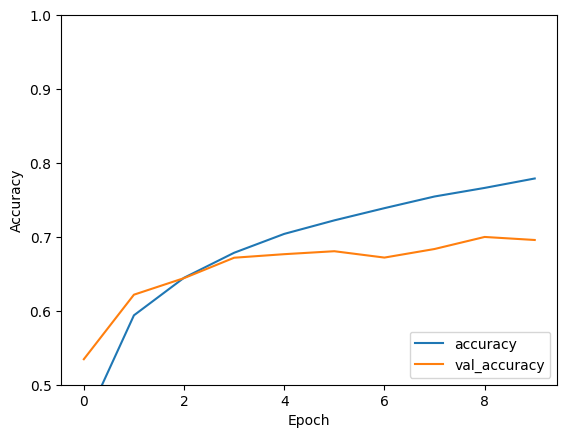

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.6958000063896179


您的简单 CNN 的测试准确率已达到 70% 以上。对于只有几行的代码来说，效果不错！对于另一种 CNN 风格，请参阅[适合专家的 TensorFlow 2 快速入门](https://tensorflow.google.cn/tutorials/quickstart/advanced)示例，此示例使用了 Keras 子类化 API 和 `tf.GradientTape`。